#Prologue

말라위, 짐바브웨, 우간다, 탄자니아 등 다수의 아프리카 국가들은 아직 상수도시설이 도시를 제외한 마을 곳곳까지 마련되어 있지 않다. 상당수 마을들이 물부족으로 인해 어려움을 겪으며, 그나마 구할 수 있는 수원지는 마을에서 멀리 떨어져 있거나 적잖이 오염되어 있다. 늘 수인성 질병과 위생문제를 달고 사는 마을 주민들을 위해 각 국 정부부처, 수도국은 자선단체와 NGO, 기업이나 개인 투자자들과 긴밀히 협력해 마을과 학교 근처에 water point(우물)를 설치하여 물부족 문제를 해결하고 있다. \


\
water point는 유지보수가 굉장히 중요하다. 소홀한 관리로 인해 물이 오염되거나 심지어 수원이 막히는 경우가 있는데, 이 경우 새로운 수원지를 찾아 수자원시설을 마련하는 것은 결코 쉽지 않은 일이다. 마을 주민들의 생계와 생존에 직결되는 부분이기 때문에 water point의 현황을 꾸준히 모니터링하고 관리하며 문제를 예방하는 것이 굉장히 중요하다.





#Part1

우리는 Taarifa 와 탄자니아 수자원부에서 집계한 **탄자니아 각 지역의 water point데이터를 사용하여 어떤 곳이 작동하는지, 수리가 필요한지, 어떤 곳이 전혀 작동하지 않는지 예측하는 모델을 만들고자** 한다. \

작동 중인 우물의 종류, 설치시기 및 관리 방법 등에 대한 다양한 변수를 기반으로 waterp point의 작동 여부와 수리 필요여부를 판단할 수 있다면 **아프리카의 한정된 자원 하 waterp point 유지 관리 작업을 더 효율적으로 개선하고 발빠른 서비스를 가능하게 해줄 것**이며, \
이는 **탄자니아 전역 지역사회에 깨끗하고 음용 가능한 물을 사용하는 것을 보장**해줄 수 있을 것이다. \

\
*데이터는 탄자니아 수자원부의 데이터를 집계하는 Taarifa waterpoints 대시보드에서 가져왔습니다. \
(Taarifa는 크라우드 소싱 보고 및 인프라 관련 문제 분류를 위한 오픈 소스 플랫폼입니다.)*

In [ ]:
from google.colab import auth
auth.authenticate_user()
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files
import pandas as pd

df = pd.read_csv('/content/drive/My Drive/pump it up/dataset_values.csv')

In [ ]:
from google.colab import files

df_target = pd.read_csv('/content/drive/My Drive/pump it up/dataset_labels.csv')

In [ ]:
df['status'] = df_target['status_group']

In [ ]:
#특성과 타겟을 모두 갖춘 데이터셋
df

id  amount_tsh date_recorded           funder  gps_height  \
0      69572      6000.0    2011-03-14            Roman        1390   
1       8776         0.0    2013-03-06          Grumeti        1399   
2      34310        25.0    2013-02-25     Lottery Club         686   
3      67743         0.0    2013-01-28           Unicef         263   
4      19728         0.0    2011-07-13      Action In A           0   
...      ...         ...           ...              ...         ...   
59395  60739        10.0    2013-05-03  Germany Republi        1210   
59396  27263      4700.0    2011-05-07      Cefa-njombe        1212   
59397  37057         0.0    2011-04-11              NaN           0   
59398  31282         0.0    2011-03-08            Malec           0   
59399  26348         0.0    2011-03-23       World Bank         191   

          installer  longitude   latitude              wpt_name  num_private  \
0             Roman  34.938093  -9.856322                  none            0   
1           GRUMETI  34.698766  -2.147466              Zahanati            0   
2      World vision  37.460664  -3.821329           Kwa Mahundi            0   
3            UNICEF  38.486161 -11.155298  Zahanati Ya Nanyumbu            0   
4           Artisan  31.130847  -1.825359               Shuleni            0   
...             ...        ...        ...                   ...          ...   
59395           CES  37.169807  -3.253847   Area Three Namba 27            0   
59396          Cefa  35.249991  -9.070629     Kwa Yahona Kuvala            0   
59397           NaN  34.017087  -8.750434               Mashine            0   
59398          Musa  35.861315  -6.378573                Mshoro            0   
59399         World  38.104048  -6.747464       Kwa Mzee Lugawa            0   

       ... water_quality quality_group      quantity  quantity_group  \
0      ...          soft          good        enough          enough   
1      ...          soft          good  insufficient    insufficient   
2      ...          soft          good        enough          enough   
3      ...          soft          good           dry             dry   
4      ...          soft          good      seasonal        seasonal   
...    ...           ...           ...           ...             ...   
59395  ...          soft          good        enough          enough   
59396  ...          soft          good        enough          enough   
59397  ...      fluoride      fluoride        enough          enough   
59398  ...          soft          good  insufficient    insufficient   
59399  ...         salty         salty        enough          enough   

                     source           source_type source_class  \
0                    spring                spring  groundwater   
1      rainwater harvesting  rainwater harvesting      surface   
2                       dam                   dam      surface   
3               machine dbh              borehole  groundwater   
4      rainwater harvesting  rainwater harvesting      surface   
...                     ...                   ...          ...   
59395                spring                spring  groundwater   
59396                 river            river/lake      surface   
59397           machine dbh              borehole  groundwater   
59398          shallow well          shallow well  groundwater   
59399          shallow well          shallow well  groundwater   

                   waterpoint_type waterpoint_type_group          status  
0               communal standpipe    communal standpipe      functional  
1               communal standpipe    communal standpipe      functional  
2      communal standpipe multiple    communal standpipe      functional  
3      communal standpipe multiple    communal standpipe  non functional  
4               communal standpipe    communal standpipe      functional  
...                            ...                   ...             ...  
59395        

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

###데이터셋 특성 설명

id : 해당 우물에 부여된 id\
amount_tsh : 우물 설치에 소요된 자금 (탄자니아 화폐단위)\
date_recorded : 기록 날짜\
funder : 자금 제공자\
gps_height : 우물의 고도\
installer : 우물을 설치한 기관\
longitude : GPS 좌표\
latitude : GPS 좌표\
wpt_name : 워터포인트가 있는 경우 워터포인트의 이름\
num_private : \
basin : 지리적 유역\
subvillage : 지리적 위치\
region : 지리적 위치\
region_code : 지리적 위치(코딩)\
district_code : 지리적 위치(코딩)\
lga : 지리적 위치\
ward : 지리적 위치\
population : 우물 주변의 인구\
public_meeting : 미팅 여부\
recorded_by : 본 데이터를 입력하는 그룹\
scheme_management : 워터포인트를 운영하는 사람\
scheme_name : 워터포인트를 운영하는 사람의 이름\
permit : 워터포인트가 허용되는 경우\
construction_year : 워터포인트가 건설된 연도\
extraction_type : 워터포인트가 사용하는 추출의 종류\
extraction_type_group : 워터포인트가 사용하는 추출의 종류\
extraction_type_class : 워터포인트가 사용하는 추출의 종류\
management : 워터포인트 관리 방법\
management_group : 워터포인트 관리 방법\
payment : 물 비용\
payment_type : 물 비용\
water_quality : 물의 품질\
quality_group : 물의 품질\
quantity : 물의 양\
quantity_group : 물의 양\
source : 물의 근원\
source_type : 물의 근원\
source_class : 물의 근원\
waterpoint_type : 워터포인트의 종류\
waterpoint_type_group : 워터포인트의 종류\
**status : 워터포인트(우물)의 작동여부, 수리 필요 여부 (target)**

In [ ]:
#타겟 클래스 확인
df['status'].value_counts()

functional                 32259
non functional             22824
functional needs repair     4317
Name: status, dtype: int64

feature들을 보면 feature의 정의는 같으나 표현 방식이 다르거나, 혹은 같은 분야의 변수에 type - group - class로 나뉘어져 있는 것이 보임.\
데이터 값들을 유심히 관찰해 상관관계가 높거나 표현 방식이 다른 컬럼은 정리하고자 함

##EDA 및 전처리

### 1. Location

In [ ]:
df_location = df.loc[:,['gps_height', 'longitude', 'latitude', 'subvillage' ,'region', 'region_code', 'district_code', 'lga', 'ward']]
df_location

gps_height  longitude   latitude    subvillage       region  \
0            1390  34.938093  -9.856322      Mnyusi B       Iringa   
1            1399  34.698766  -2.147466       Nyamara         Mara   
2             686  37.460664  -3.821329       Majengo      Manyara   
3             263  38.486161 -11.155298    Mahakamani       Mtwara   
4               0  31.130847  -1.825359    Kyanyamisa       Kagera   
...           ...        ...        ...           ...          ...   
59395        1210  37.169807  -3.253847      Kiduruni  Kilimanjaro   
59396        1212  35.249991  -9.070629      Igumbilo       Iringa   
59397           0  34.017087  -8.750434     Madungulu        Mbeya   
59398           0  35.861315  -6.378573        Mwinyi       Dodoma   
59399         191  38.104048  -6.747464  Kikatanyemba     Morogoro   

       region_code  district_code             lga              ward  
0               11              5          Ludewa          Mundindi  
1               20              2       Serengeti             Natta  
2               21              4       Simanjiro           Ngorika  
3               90             63        Nanyumbu          Nanyumbu  
4               18              1         Karagwe        Nyakasimbi  
...            ...            ...             ...               ...  
59395            3              5             Hai  Masama Magharibi  
59396           11              4          Njombe            Ikondo  
59397           12              7         Mbarali           Chimala  
59398            1              4        Chamwino      Mvumi Makulu  
59399            5              2  Morogoro Rural        Ngerengere  

[59400 rows x 9 columns]

In [ ]:
df_location.nunique()

gps_height        2428
longitude        57516
latitude         57517
subvillage       19287
region              21
region_code         27
district_code       20
lga                125
ward              2092
dtype: int64

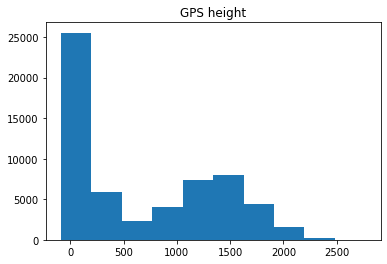

In [ ]:
import matplotlib.pyplot as plt

plt.hist(df_location['gps_height'])
plt.title('GPS height')
plt.show()

`gps_height`컬럼의 0값은 결측치로 보임(해발고도를 나타낸 값으로 0은 해수면을 의미함) \


In [ ]:
df_location[df_location['gps_height'] == 0]['region'].value_counts()

Shinyanga        4818
Mbeya            4639
Kagera           3316
Mwanza           2735
Dodoma           2201
Tabora           1959
Tanga             493
Morogoro          244
Pwani              24
Lindi               4
Dar es Salaam       3
Mtwara              2
Name: region, dtype: int64

gps 고도값이 0인 데이터 중, 비교적 카디널리티가 적고 검색이 용이한 `region`컬럼의 값들을 기준으로 고도값을 검색해서 넣어주기로 함

In [ ]:
height={'Shinyanga':1233,'Mbeya':1360,'Kagera':1199, 
        'Mwanza':1138, 'Dodoma':1741,'Tabora':1177, 
        'Tanga':458, 'Morogoro':254, 'Pwani':258,
        'Lindi':317, 'Dar es Salaam':52, 'Mtwara':470}

In [ ]:
for region in df_location[df_location['gps_height'] == 0]['region'].value_counts().index:
  df.loc[((df['region']==region) & (df['gps_height'] ==0)),'gps_height']=height[region]

In [ ]:
#gps_height 값 확인
(df['gps_height']==0).sum()

0

In [ ]:
df_location[df_location['lga'] == 'Ludewa']

gps_height  longitude   latitude  subvillage  region  region_code  \
0            1390  34.938093  -9.856322    Mnyusi B  Iringa           11   
19           1763  34.508967  -9.894412    Manyanya  Iringa           11   
33           1638  34.478356  -9.715910   Lupanga A  Iringa           11   
135          2050  34.688597  -9.696226   Ligelango  Iringa           11   
389          1694  34.503924  -9.873567     Kiwanja  Iringa           11   
...           ...        ...        ...         ...     ...          ...   
58719        1679  34.476373  -9.816660    Iyunguya  Iringa           11   
58779         446  34.608765 -10.519718         Ccm  Iringa           11   
58796        1876  34.519530  -9.796345  Ihonjogolo  Iringa           11   
59095        1328  34.624630  -9.972169      Malato  Iringa           11   
59380        1439  34.942101  -9.849198    Mnyusi B  Iringa           11   

       district_code     lga      ward  
0                  5  Ludewa  Mundindi  
19                 5  Ludewa   Mawengi  
33                 5  Ludewa   Lupanga  
135                5  Ludewa    Madope  
389                5  Ludewa   Mawengi  
...              ...     ...       ...  
58719              5  Ludewa   Mawengi  
58779              5  Ludewa     Manda  
58796              5  Ludewa  Mlangali  
59095              5  Ludewa     Luana  
59380              5  Ludewa  Mundindi  

[564 rows x 9 columns]

탄자니아 행정구역에 대해 설명해보자면, 탄자니아는 31개의 region으로 나뉘고, 각 region은 184개의 district로 세분화되며, \
district 산하 다수의 ward가 속해있다. 여기서 lga는 district와 주요 도시를 포함한 지방 행정 구역을 의미한다. \

카디널리티가 가장 높은 subvillage는 탄자니아의 지역단위 중 가장 작은 소마을 단위를 나타낸다고 볼 수 있다. \

지역 값에 대한 카디널리티가 높은 것은 해당 우물의 위치를 정확하게 알려주는 역할을 하지만, 모델의 성능을 떨어뜨릴 수 있기 때문에 location을 적절하게 정리하고 표현하는 것이 중요할 것 같다.

GPS 좌표를 참고하여 각 waterpoint를 그려본 결과, 대략적인 탄자니아 영토의 그림이 나옴 \

그 중 좌상단에 이상치 존재함을 발견

In [ ]:
import plotly.express as px
fig = px.scatter(data_frame=df_location,y=df_location['latitude'], x=df_location['longitude'],color=df_location['lga'],opacity=0.5)
fig.show()

In [ ]:
df_gps_nan = df_location[(df_location['longitude'] == 0)]
df_gps_nan

gps_height  longitude      latitude  subvillage     region  \
21              0        0.0 -2.000000e-08  Ibabachegu  Shinyanga   
53              0        0.0 -2.000000e-08      Center     Mwanza   
168             0        0.0 -2.000000e-08       Ilula  Shinyanga   
177             0        0.0 -2.000000e-08      Mahaha  Shinyanga   
253             0        0.0 -2.000000e-08   Nyamatala     Mwanza   
...           ...        ...           ...         ...        ...   
59189           0        0.0 -2.000000e-08   Mwamabuli  Shinyanga   
59208           0        0.0 -2.000000e-08       Mbiti  Shinyanga   
59295           0        0.0 -2.000000e-08   Mwamalizi  Shinyanga   
59324           0        0.0 -2.000000e-08       Mbita  Shinyanga   
59374           0        0.0 -2.000000e-08  Mwamtani A  Shinyanga   

       region_code  district_code      lga               ward  
21              17              1  Bariadi  Ikungulyabashashi  
53              19              6    Geita        Nyang'hwale  
168             17              1  Bariadi          Chinamili  
177             17              1  Bariadi          Bunamhala  
253             19              2     Magu             Malili  
...            ...            ...      ...                ...  
59189           17              1  Bariadi             Mhunze  
59208           17              1  Bariadi        Kinang'weli  
59295           17              1  Bariadi          Chinamili  
59324           17              1  Bariadi              Mbita  
59374           17              1  Bariadi             Sagata  

[1812 rows x 9 columns]

In [ ]:
df_location[(df_location['longitude'] != 0) & (df_location['lga'] == 'Bariadi')]

gps_height  longitude  latitude          subvillage     region  \
383          1362  34.217656 -2.974327             Mtakuja  Shinyanga   
764          1356  34.144579 -2.956513              Matare  Shinyanga   
795          1328  34.175690 -2.972687            Kiluluma  Shinyanga   
1291         1340  34.042961 -2.954429              Musoma  Shinyanga   
1666         1354  34.176786 -2.928304           Ndolelezi  Shinyanga   
...           ...        ...       ...                 ...        ...   
58303        1378  34.235404 -2.966587             Matumbi  Shinyanga   
58464        1311  34.001878 -3.016739  Mwambaga Magharibi  Shinyanga   
58762        1359  34.232772 -2.936518         Mwakiliyoma  Shinyanga   
58789        1302  34.017314 -3.037176         Nkoma Mjini  Shinyanga   
59018        1340  34.122949 -2.903263       Mitobo Centre  Shinyanga   

       region_code  district_code      lga           ward  
383             17              1  Bariadi         Mhunze  
764             17              1  Bariadi  Lagangabilili  
795             17              1  Bariadi         Mhunze  
1291            17              1  Bariadi          Nkoma  
1666            17              1  Bariadi  Lagangabilili  
...            ...            ...      ...            ...  
58303           17              1  Bariadi         Mhunze  
58464           17              1  Bariadi          Nkoma  
58762           17              1  Bariadi         Mhunze  
58789           17              1  Bariadi          Nkoma  
59018           17              1  Bariadi  Lagangabilili  

[172 rows x 9 columns]

위도, 경도 값이 오류, 하지만 lga 값을 기준으로 정상적인 값을 찾을 수 있었음. \
따라서 lga를 기준으로 평균치를 찾아 메꿔주는 방법으로 이상치를 대체하도록 함

In [ ]:
import numpy as np

In [ ]:
df_gps_nan['lga'].value_counts()

Bariadi    1005
Geita       488
Magu        319
Name: lga, dtype: int64

다행히 GPS 좌표값이 문제인 데이터의 lga는 3군데로 나타남

In [ ]:
#GPS 좌표값 문제인 데이터를 결측치 처리
for i in df[df['longitude'] == 0].index:
  df.loc[i, 'longitude'] = np.nan
  df.loc[i, 'latitude'] = np.nan

In [ ]:
df['longitude'].isnull().sum()

1812

In [ ]:
#GPS 결측치 존재하는 lga 리스트
lga_list = ['Bariadi', 'Geita', 'Magu']

In [ ]:
#lga에 해당하는 GPS값의 평균으로 결측치 대체
for i in df_gps_nan.index:
  if df.loc[i, 'lga'] == 'Bariadi':
    df.loc[i, 'longitude'] = df[df['lga'] == 'Bariadi']['longitude'].mean()
    df.loc[i, 'latitude'] = df[df['lga'] == 'Bariadi']['latitude'].mean()

In [ ]:
#lga 'Geita'는 모든 GPS값에 문제가 있으므로, 대표 GPS값을 검색하여 넣어주기로 함
for i in df_gps_nan.index:
  if df.loc[i, 'lga'] == 'Geita':
    df.loc[i, 'longitude'] = 32.231354
    df.loc[i, 'latitude'] = -2.885038

In [ ]:
for i in df_gps_nan.index:
  if df.loc[i, 'lga'] == 'Magu':
    df.loc[i, 'longitude'] = df[df['lga'] == 'Magu']['longitude'].mean()
    df.loc[i, 'latitude'] = df[df['lga'] == 'Magu']['latitude'].mean()

In [ ]:
#결측치 대체 확인
df['longitude'].isnull().sum()

0

In [ ]:
import plotly.express as px
fig = px.scatter(data_frame=df,y=df['latitude'], x=df['longitude'],color=df_location['lga'],opacity=0.5)
fig.show()

GPS 좌표에 따른 waterpoint 정상 출력 확인

이어서 탄자니아의 가장 큰 지역단위인 `region`컬럼을 두고, `region_code`, `district_code`컬럼은 인코딩 과정을 고려해서 drop함 \

그리고`lga`, `ward`컬럼을 두고 `subvillage`컬럼을 drop하도록 함. \
waterpoint의 세부적인 위치는 GPS좌표를 참고하는 것으로 한다.

In [ ]:
df.drop(labels=['subvillage','region_code','district_code'], axis=1, inplace=True)

###2. Scheme

In [ ]:
df_Sche = df.loc[:,['scheme_management' ,'scheme_name']]
df_Sche

scheme_management                  scheme_name
0                   VWC                        Roman
1                 Other                          NaN
2                   VWC  Nyumba ya mungu pipe scheme
3                   VWC                          NaN
4                   NaN                          NaN
...                 ...                          ...
59395       Water Board       Losaa Kia water supply
59396               VWC  Ikondo electrical water sch
59397               VWC                          NaN
59398               VWC                          NaN
59399               VWC                          NaN

[59400 rows x 2 columns]

In [ ]:
print(df_Sche['scheme_management'].value_counts())
print(df_Sche['scheme_name'].value_counts())

VWC                 36793
WUG                  5206
Water authority      3153
WUA                  2883
Water Board          2748
Parastatal           1680
Private operator     1063
Company              1061
Other                 766
SWC                    97
Trust                  72
None                    1
Name: scheme_management, dtype: int64
K                       682
None                    644
Borehole                546
Chalinze wate           405
M                       400
                       ... 
Mradi wa maji Vijini      1
Villagers                 1
Magundi water supply      1
Saadani Chumv             1
Mtawanya                  1
Name: scheme_name, Length: 2696, dtype: int64


우물 관리자에 대한 내용인데, 대부분의 정보가 뒤 Management에 나타나있고, \
`scheme_name`컬럼의 경우 관리자 개인의 이름이 대다수인데다 결측치도 많다. \

따라서 두 컬럼 다 drop하고자 함

In [ ]:
df.drop(labels=['scheme_management', 'scheme_name'], axis=1, inplace=True)

###3. Extraction

In [ ]:
df_Extraction = df.loc[:,['extraction_type','extraction_type_group','extraction_type_class']]
df_Extraction

extraction_type extraction_type_group extraction_type_class
0             gravity               gravity               gravity
1             gravity               gravity               gravity
2             gravity               gravity               gravity
3         submersible           submersible           submersible
4             gravity               gravity               gravity
...               ...                   ...                   ...
59395         gravity               gravity               gravity
59396         gravity               gravity               gravity
59397          swn 80                swn 80              handpump
59398     nira/tanira           nira/tanira              handpump
59399     nira/tanira           nira/tanira              handpump

[59400 rows x 3 columns]

In [ ]:
df_Extraction.nunique()

extraction_type          18
extraction_type_group    13
extraction_type_class     7
dtype: int64

In [ ]:
print(df_Extraction['extraction_type'].value_counts())
print(df_Extraction['extraction_type_group'].value_counts())
print(df_Extraction['extraction_type_class'].value_counts())

gravity                      26780
nira/tanira                   8154
other                         6430
submersible                   4764
swn 80                        3670
mono                          2865
india mark ii                 2400
afridev                       1770
ksb                           1415
other - rope pump              451
other - swn 81                 229
windmill                       117
india mark iii                  98
cemo                            90
other - play pump               85
walimi                          48
climax                          32
other - mkulima/shinyanga        2
Name: extraction_type, dtype: int64
gravity            26780
nira/tanira         8154
other               6430
submersible         6179
swn 80              3670
mono                2865
india mark ii       2400
afridev             1770
rope pump            451
other handpump       364
other motorpump      122
wind-powered         117
india mark iii        98
Name: ext

우물의 물을 퍼내는 방식, 어떤 종류의 우물인지로도 볼 수 있는 컬럼들이다. \
핸드펌프, 전자동, 중력, 로프 형식 등 굉장히 다양한 방식의 우물을 나타내는 값으로\
우물의 기능 여부와 수리 여부를 판단하는 데 중요한 컬럼들로 예상되며, \
swn 80, swn 81처럼 같은 기기의 버젼까지 세부적으로 나타낸 `extraction_type`컬럼을 사용하고 나머지 컬럼은 drop하고자 한다. \
다만 `extraction_type`컬럼 값에 "other - "는 삭제를 해주고 사용하려고 한다.


In [ ]:
df.drop(labels=['extraction_type_group','extraction_type_class'], axis=1, inplace=True)

*extraction_type컬럼 값에 "other - " 삭제*

In [ ]:
a = df[df['extraction_type'].str.contains('other - ')]
a = a['extraction_type'].str.replace('other - ','')

for i in a.index:
  df.loc[i,'extraction_type'] = a.loc[i]

In [ ]:
#"other - " 삭제 확인
df['extraction_type'].str.contains('other - ').sum()

0

In [ ]:
df['extraction_type'].value_counts()

gravity              26780
nira/tanira           8154
other                 6430
submersible           4764
swn 80                3670
mono                  2865
india mark ii         2400
afridev               1770
ksb                   1415
rope pump              451
swn 81                 229
windmill               117
india mark iii          98
cemo                    90
play pump               85
walimi                  48
climax                  32
mkulima/shinyanga        2
Name: extraction_type, dtype: int64

###4. Management

In [ ]:
df_Manage = df.loc[:,['management','management_group']]
df_Manage

management management_group
0              vwc       user-group
1              wug       user-group
2              vwc       user-group
3              vwc       user-group
4            other            other
...            ...              ...
59395  water board       user-group
59396          vwc       user-group
59397          vwc       user-group
59398          vwc       user-group
59399          vwc       user-group

[59400 rows x 2 columns]

In [ ]:
df_Manage.value_counts()

management        management_group
vwc               user-group          40507
wug               user-group           6515
water board       user-group           2933
wua               user-group           2535
private operator  commercial           1971
parastatal        parastatal           1768
water authority   commercial            904
other             other                 844
company           commercial            685
unknown           unknown               561
other - school    other                  99
trust             commercial             78
dtype: int64

In [ ]:
print(df_Manage['management'].value_counts())
print(df_Manage['management_group'].value_counts())

vwc                 40507
wug                  6515
water board          2933
wua                  2535
private operator     1971
parastatal           1768
water authority       904
other                 844
company               685
unknown               561
other - school         99
trust                  78
Name: management, dtype: int64
user-group    52490
commercial     3638
parastatal     1768
other           943
unknown         561
Name: management_group, dtype: int64


management는 해당 우물의 관리 주체를 나타낸 것으로 보임\
user-group은 우물을 사용하는 마을 커뮤니티\
commercial은 회사, 기금, 해당지역 수도국 등 다양하며\
parastatal은 준국가기관으로 정부 부처 연계 혹은 승인한 준정부기관을 의미하는 것으로 보임 \

우물 관리 주체의 특성에 따라 우물의 기능여부도 차이가 있을 것으로 예상됨. 따라서 \

기존 `management`컬럼을 사용, `management_group`을 drop하되\
vmc, wug, water board, wua는 user-group으로 변경하고\
other - school의 "other - "를 제거하고자 한다.



In [ ]:
df.drop(labels=['management_group'], axis=1, inplace=True)

*vmc, wug, water board, wua는 user-group으로 변경*

In [ ]:
a = ['vwc', 'wug', 'water board', 'wua']
for x in a:
  df['management'] = df['management'].str.replace(x, 'user-group')

*other - school의 'other - '삭제*

In [ ]:
a = df[df['management'].str.contains('other - ')]
a['management']

636      other - school
4454     other - school
4466     other - school
5654     other - school
6343     other - school
              ...      
57169    other - school
57867    other - school
58564    other - school
58795    other - school
59001    other - school
Name: management, Length: 99, dtype: object

In [ ]:
for i in a.index:
  df.loc[i,'management'] = 'school'

In [ ]:
#user-group, school 적용 확인
df['management'].value_counts()

user-group          52490
private operator     1971
parastatal           1768
water authority       904
other                 844
company               685
unknown               561
school                 99
trust                  78
Name: management, dtype: int64

###5. Payment

In [ ]:
df_Pay = df.loc[:,['payment','payment_type']]
df_Pay

payment payment_type
0               pay annually     annually
1                  never pay    never pay
2             pay per bucket   per bucket
3                  never pay    never pay
4                  never pay    never pay
...                      ...          ...
59395         pay per bucket   per bucket
59396           pay annually     annually
59397            pay monthly      monthly
59398              never pay    never pay
59399  pay when scheme fails   on failure

[59400 rows x 2 columns]

In [ ]:
print(df_Pay['payment'].value_counts())
print(df_Pay['payment_type'].value_counts())

never pay                25348
pay per bucket            8985
pay monthly               8300
unknown                   8157
pay when scheme fails     3914
pay annually              3642
other                     1054
Name: payment, dtype: int64
never pay     25348
per bucket     8985
monthly        8300
unknown        8157
on failure     3914
annually       3642
other          1054
Name: payment_type, dtype: int64


우물 사용에 대한 비용을 지불하는 것은 우물 유지보수관리 및 커뮤니티의 자립 의지 고취, 사용자의 자립에도 중요하고 긍정적인 영향을 준다. \
두 컬럼의 카디널리티와 데이터의 수가 같기 때문에 `payment`컬럼을 drop하겠음

In [ ]:
df.drop(labels=['payment'], axis=1, inplace=True)

###6. Quality

In [ ]:
df_Qual = df.loc[:,['water_quality','quality_group']]
df_Qual

water_quality quality_group
0              soft          good
1              soft          good
2              soft          good
3              soft          good
4              soft          good
...             ...           ...
59395          soft          good
59396          soft          good
59397      fluoride      fluoride
59398          soft          good
59399         salty         salty

[59400 rows x 2 columns]

In [ ]:
print(df_Qual['water_quality'].value_counts())
print(df_Qual['quality_group'].value_counts())

soft                  50818
salty                  4856
unknown                1876
milky                   804
coloured                490
salty abandoned         339
fluoride                200
fluoride abandoned       17
Name: water_quality, dtype: int64
good        50818
salty        5195
unknown      1876
milky         804
colored       490
fluoride      217
Name: quality_group, dtype: int64


물의 품질에 대한 값들인데, \
milky는 희뿌연\
coloured는 (특정) 색깔이 있는\
salty abandoned는 salty와 같은 짠맛\
fluoride abandoned는 fluoride와 같은 불소가 가미된 \
의미로 파악됨. \

두 컬럼의 값이 같은 의미를 띄고 있고, `quality_group`컬럼이 좀 더 낮은 카디널리티에\
간결하고 명확한 의미를 띄고 있으므로 `water_quality`컬럼을 drop하기로 함


In [ ]:
df.drop(labels=['water_quality'], axis=1, inplace=True)

###7. Quantity

In [ ]:
df_Quan = df.loc[:,['quantity','quantity_group']]
df_Quan

quantity quantity_group
0            enough         enough
1      insufficient   insufficient
2            enough         enough
3               dry            dry
4          seasonal       seasonal
...             ...            ...
59395        enough         enough
59396        enough         enough
59397        enough         enough
59398  insufficient   insufficient
59399        enough         enough

[59400 rows x 2 columns]

In [ ]:
print(df_Quan['quantity'].value_counts())
print(df_Quan['quantity_group'].value_counts())

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity, dtype: int64
enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity_group, dtype: int64


우물 물의 양에 대한 데이터인데, 두 컬럼이 완전 동일하므로 한 컬럼을 drop하도록 함

In [ ]:
df.drop(labels=['quantity_group'], axis=1, inplace=True)

###8. Source

In [ ]:
df_Source = df.loc[:,['source','source_type','source_class']]
df_Source

source           source_type source_class
0                    spring                spring  groundwater
1      rainwater harvesting  rainwater harvesting      surface
2                       dam                   dam      surface
3               machine dbh              borehole  groundwater
4      rainwater harvesting  rainwater harvesting      surface
...                     ...                   ...          ...
59395                spring                spring  groundwater
59396                 river            river/lake      surface
59397           machine dbh              borehole  groundwater
59398          shallow well          shallow well  groundwater
59399          shallow well          shallow well  groundwater

[59400 rows x 3 columns]

In [ ]:
print(df_Source['source'].value_counts())
print(df_Source['source_type'].value_counts())
print(df_Source['source_class'].value_counts())

spring                  17021
shallow well            16824
machine dbh             11075
river                    9612
rainwater harvesting     2295
hand dtw                  874
lake                      765
dam                       656
other                     212
unknown                    66
Name: source, dtype: int64
spring                  17021
shallow well            16824
borehole                11949
river/lake              10377
rainwater harvesting     2295
dam                       656
other                     278
Name: source_type, dtype: int64
groundwater    45794
surface        13328
unknown          278
Name: source_class, dtype: int64


In [ ]:
df_Source[df_Source['source_class'] == 'unknown']

source source_type source_class
5        other       other      unknown
277      other       other      unknown
323      other       other      unknown
820      other       other      unknown
1155     other       other      unknown
...        ...         ...          ...
58898    other       other      unknown
58940    other       other      unknown
59257    other       other      unknown
59310  unknown       other      unknown
59370  unknown       other      unknown

[278 rows x 3 columns]

우물의 수원을 나타낸 컬럼인데, `source`컬럼과 `source_type`컬럼의 값을 비교하면\
`source`컬럼의 machine dbh와 hand dtw를 합쳐 `source_type`컬럼의 borehole값으로 표현(borehole은 땅을 시추한 구멍을 나타냄) \

river와 lake를 합쳐 river/lake, other와 unknown을 합쳐 other로 표현하는 등\
`source_type`컬럼이 다양한 방식의 수원 데이터를 적절히 정리해서 잘 보여주고 있으므로\
`source`컬럼과 `source_class`컬럼은 drop하겠음




In [ ]:
df.drop(labels=['source','source_class'], axis=1, inplace=True)

###9. Waterpoint

In [ ]:
df_Wpoint = df.loc[:,['waterpoint_type','waterpoint_type_group']]
df_Wpoint

waterpoint_type waterpoint_type_group
0               communal standpipe    communal standpipe
1               communal standpipe    communal standpipe
2      communal standpipe multiple    communal standpipe
3      communal standpipe multiple    communal standpipe
4               communal standpipe    communal standpipe
...                            ...                   ...
59395           communal standpipe    communal standpipe
59396           communal standpipe    communal standpipe
59397                    hand pump             hand pump
59398                    hand pump             hand pump
59399                    hand pump             hand pump

[59400 rows x 2 columns]

In [ ]:
print(df_Wpoint['waterpoint_type'].value_counts())
print(df_Wpoint['waterpoint_type_group'].value_counts())

communal standpipe             28522
hand pump                      17488
other                           6380
communal standpipe multiple     6103
improved spring                  784
cattle trough                    116
dam                                7
Name: waterpoint_type, dtype: int64
communal standpipe    34625
hand pump             17488
other                  6380
improved spring         784
cattle trough           116
dam                       7
Name: waterpoint_type_group, dtype: int64


우물(water point)의 유형에 대한 설명을 나타낸 컬럼인데, \
두 컬럼 중 유일하게 다른 값인 'communal standpipe multiple'은\
'communal standpipe'의 종류로 보임. 따라서 `waterpoint_type`컬럼을 drop하고\
`waterpoint_type_group`컬럼을 사용하도록 함

In [ ]:
df.drop(labels=['waterpoint_type'], axis=1, inplace=True)

###10. 기타 데이터 전반 전처리

In [ ]:
df

id  amount_tsh date_recorded           funder  gps_height  \
0      69572      6000.0    2011-03-14            Roman        1390   
1       8776         0.0    2013-03-06          Grumeti        1399   
2      34310        25.0    2013-02-25     Lottery Club         686   
3      67743         0.0    2013-01-28           Unicef         263   
4      19728         0.0    2011-07-13      Action In A        1199   
...      ...         ...           ...              ...         ...   
59395  60739        10.0    2013-05-03  Germany Republi        1210   
59396  27263      4700.0    2011-05-07      Cefa-njombe        1212   
59397  37057         0.0    2011-04-11              NaN        1360   
59398  31282         0.0    2011-03-08            Malec        1741   
59399  26348         0.0    2011-03-23       World Bank         191   

          installer  longitude   latitude              wpt_name  num_private  \
0             Roman  34.938093  -9.856322                  none            0   
1           GRUMETI  34.698766  -2.147466              Zahanati            0   
2      World vision  37.460664  -3.821329           Kwa Mahundi            0   
3            UNICEF  38.486161 -11.155298  Zahanati Ya Nanyumbu            0   
4           Artisan  31.130847  -1.825359               Shuleni            0   
...             ...        ...        ...                   ...          ...   
59395           CES  37.169807  -3.253847   Area Three Namba 27            0   
59396          Cefa  35.249991  -9.070629     Kwa Yahona Kuvala            0   
59397           NaN  34.017087  -8.750434               Mashine            0   
59398          Musa  35.861315  -6.378573                Mshoro            0   
59399         World  38.104048  -6.747464       Kwa Mzee Lugawa            0   

       ... payment_type water_quality quality_group      quantity  \
0      ...     annually          soft          good        enough   
1      ...    never pay          soft          good  insufficient   
2      ...   per bucket          soft          good        enough   
3      ...    never pay          soft          good           dry   
4      ...    never pay          soft          good      seasonal   
...    ...          ...           ...           ...           ...   
59395  ...   per bucket          soft          good        enough   
59396  ...     annually          soft          good        enough   
59397  ...      monthly      fluoride      fluoride        enough   
59398  ...    never pay          soft          good  insufficient   
59399  ...   on failure         salty         salty        enough   

       quantity_group                source           source_type  \
0              enough                spring                spring   
1        insufficient  rainwater harvesting  rainwater harvesting   
2              enough                   dam                   dam   
3                 dry           machine dbh              borehole   
4            seasonal  rainwater harvesting  rainwater harvesting   
...               ...                   ...                   ...   
59395          enough                spring                spring   
59396          enough                 river            river/lake   
59397          enough           machine dbh              borehole   
59398    insufficient          shallow well          shallow well   
59399          enough          shallow well          shallow well   

       source_class waterpoint_type_group          status  
0       groundwater    communal standpipe      functional  
1           surface    communal standpipe      functional  
2           surface    communal standpipe      functional  
3       groundwater    communal standpipe  non functional  
4           surface    communal standpipe      functional  
...             ...                   ...             ...  
59395   groundwater    communal standpipe      functional  
59396       surface    communal standpipe      functional 

In [ ]:
df.isnull().sum()

id                          0
amount_tsh                  0
date_recorded               0
funder                   3635
gps_height                  0
installer                3655
longitude                   0
latitude                    0
wpt_name                    0
num_private                 0
basin                       0
subvillage                371
region                      0
region_code                 0
district_code               0
lga                         0
ward                        0
population                  0
public_meeting           3334
recorded_by                 0
permit                   3056
construction_year           0
extraction_type             0
extraction_type_group       0
extraction_type_class       0
management                  0
management_group            0
payment                     0
payment_type                0
water_quality               0
quality_group               0
quantity                    0
quantity_group              0
source    

In [ ]:
df.nunique()

id                       59400
amount_tsh                  98
date_recorded              356
funder                    1897
gps_height                2427
installer                 2145
longitude                57516
latitude                 57517
wpt_name                 37400
num_private                 65
basin                        9
subvillage               19287
region                      21
region_code                 27
district_code               20
lga                        125
ward                      2092
population                1049
public_meeting               2
recorded_by                  1
permit                       2
construction_year           55
extraction_type             18
extraction_type_group       13
extraction_type_class        7
management                  12
management_group             5
payment                      7
payment_type                 7
water_quality                8
quality_group                6
quantity                     5
quantity

`funder`와 `installer`컬럼의 경우, 결측치도 많지만 카디널리티가 높음


In [ ]:
df['funder'].value_counts(dropna=False).loc[lambda x:x>50]

Government Of Tanzania    9084
NaN                       3635
Danida                    3114
Hesawa                    2202
Rwssp                     1374
                          ... 
Wfp                         52
Cocen                       52
China Government            51
Tanapa                      51
Ta                          51
Name: funder, Length: 143, dtype: int64

In [ ]:
df['installer'].value_counts(dropna=False).loc[lambda x:x>50]

DWE           17402
NaN            3655
Government     1825
RWE            1206
Commu          1060
              ...  
Pr               53
RWE/DWE          52
RC Ch            52
wanan            52
Local te         52
Name: installer, Length: 144, dtype: int64

`funder`와 `installer`컬럼의 경우, 결측치도 많지만 카디널리티가 높아
모델 성능에 좋지 않은 영향을 미칠 가능성이 높은 반면에\
우물의 기능 여부나 수리 여부 판별에 핵심적인 역할을 하지 않을 것으로 판단 \
조회가 필요할 경우 원본 데이터에서 별도로 조회하는 것을 고려하여 본 데이터 셋에서는 drop하기로 함

In [ ]:
df.drop(labels=['funder','installer'], axis=1, inplace=True)

`wpt_name`컬럼의 경우, 워터포인트가 특정 id에 의해 식별되므로 drop하겠음

In [ ]:
df.drop(labels=['wpt_name'], axis=1, inplace=True)

In [ ]:
df['num_private'].value_counts()

0       58643
6          81
1          73
5          46
8          46
        ...  
42          1
23          1
136         1
698         1
1402        1
Name: num_private, Length: 65, dtype: int64

`num_private`컬럼은 의미가 분명치 않고, 카디널리티도 높아 모델 성능에 악영향을 미칠 가능성이 크므로 drop함\
`permit`컬럼은 water point의 허용 여부를 나타냈는데, '허용'의 의미가 불분명할 뿐더러 `permit`컬럼 값과 타겟 클래스의 관계성이 모호함. \
따라서 drop하겠음

In [ ]:
df.drop(labels=['num_private','permit'], axis=1, inplace=True)

In [ ]:
df['recorded_by'].value_counts()

GeoData Consultants Ltd    59400
Name: recorded_by, dtype: int64

In [ ]:
df['recorded_by']

0        GeoData Consultants Ltd
1        GeoData Consultants Ltd
2        GeoData Consultants Ltd
3        GeoData Consultants Ltd
4        GeoData Consultants Ltd
                  ...           
59395    GeoData Consultants Ltd
59396    GeoData Consultants Ltd
59397    GeoData Consultants Ltd
59398    GeoData Consultants Ltd
59399    GeoData Consultants Ltd
Name: recorded_by, Length: 59400, dtype: object

본 데이터를 입력한 그룹을 나타내는 `recorded_by`컬럼은 'GeoData Consultants Ltd' 단일값으로 구성되어 있음\
데이터 입력의 주체가 모델의 변수로 입력될 필요는 없으므로 drop함

In [ ]:
df.drop(labels=['recorded_by'], axis=1, inplace=True)

In [ ]:
df['public_meeting'].value_counts(dropna=False)

True     51011
False     5055
NaN       3334
Name: public_meeting, dtype: int64

`public_meeting`컬럼의 결측치를 'unknown'으로 치환함

In [ ]:
df['public_meeting'].fillna('unknown', inplace=True)

우물 주변의 인구를 나타내는 `population`컬럼의 카디널리티가 매우 높음. \
값이 0이거나 1인 경우도 많은데, 결측치 여부를 판단하긴 어려울 것 같으므로\
우선 Bucketing을 이용해서 구간별로 값을 정리하고자 함

In [ ]:
df['population'].value_counts()

0       21381
1        7025
200      1940
150      1892
250      1681
        ...  
6330        1
5030        1
656         1
948         1
788         1
Name: population, Length: 1049, dtype: int64

In [ ]:
bins = [0, 100, 500, 1000, 5000, 10000, 50000]
labels = ['less 100', 'less 500', 'less 1,000', 'less 5,000', 'less 10,000', 'less 50,000']
df['populaion_type'] = pd.cut(df['population'], bins, right=False, labels=labels)


In [ ]:
df['populaion_type'].value_counts()

less 100       36152
less 500       17611
less 1,000      3947
less 5,000      1567
less 10,000      117
less 50,000        6
Name: populaion_type, dtype: int64

In [ ]:
#population 컬럼 삭제
df.drop(labels=['population'], axis=1, inplace=True)

In [ ]:
#결측치 제거 완료
df.isnull().sum()

id                         0
amount_tsh                 0
date_recorded              0
gps_height                 0
longitude                  0
latitude                   0
basin                      0
subvillage               371
region                     0
region_code                0
district_code              0
lga                        0
ward                       0
public_meeting             0
construction_year          0
extraction_type            0
extraction_type_group      0
extraction_type_class      0
management                 0
management_group           0
payment                    0
payment_type               0
water_quality              0
quality_group              0
quantity                   0
quantity_group             0
source                     0
source_type                0
source_class               0
waterpoint_type_group      0
status                     0
populaion_type             0
dtype: int64

우물 설치년도를 나타내는 `construction_year`컬럼의 카디널리티가 매우 높음. \
값이 0인 경우도 많은데, 결측치 여부를 판단하긴 어려울 것 같으므로
우선 Bucketing을 이용해서 구간별로 값을 정리하고자 함

In [ ]:
df['construction_year'].value_counts()

0       20709
2010     2645
2008     2613
2009     2533
2000     2091
2007     1587
2006     1471
2003     1286
2011     1256
2004     1123
2012     1084
2002     1075
1978     1037
1995     1014
2005     1011
1999      979
1998      966
1990      954
1985      945
1980      811
1996      811
1984      779
1982      744
1994      738
1972      708
1974      676
1997      644
1992      640
1993      608
2001      540
1988      521
1983      488
1975      437
1986      434
1976      414
1970      411
1991      324
1989      316
1987      302
1981      238
1977      202
1979      192
1973      184
2013      176
1971      145
1960      102
1967       88
1963       85
1968       77
1969       59
1964       40
1962       30
1961       21
1965       19
1966       17
Name: construction_year, dtype: int64

In [ ]:
bins2 = [0, 1960, 1970, 1980, 1990, 2000, 2010, 2020]
labels = ['unknown', '1960s', '1970s', '1980s', '1990s', '2000s', '2010s']
df['construction_year'] = pd.cut(df['construction_year'], bins2, right=False, labels=labels)

In [ ]:
#df 컬럼 순서 변경
df = df[['id','date_recorded' ,'gps_height', 'longitude', 'latitude', 'basin', 'region', 'lga', 'ward', 'amount_tsh', 'construction_year',
         'extraction_type', 'source_type', 'waterpoint_type_group', 'management', 'payment_type', 'quality_group', 'quantity',
         'populaion_type', 'public_meeting', 'status']]

#df 컬럼 이름 정리
df.columns = ['id','date_recorded' ,'gps_height', 'longitude', 'latitude', 'basin', 'region', 'lga', 'ward', 'amount_tsh', 'construction_year',
         'extraction_type', 'source_type', 'waterpoint_type', 'management', 'payment_type', 'quality', 'quantity',
         'populaion', 'public_meeting', 'status']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   id                 59400 non-null  int64   
 1   date_recorded      59400 non-null  object  
 2   gps_height         59400 non-null  int64   
 3   longitude          59400 non-null  float64 
 4   latitude           59400 non-null  float64 
 5   basin              59400 non-null  object  
 6   region             59400 non-null  object  
 7   lga                59400 non-null  object  
 8   ward               59400 non-null  object  
 9   amount_tsh         59400 non-null  float64 
 10  construction_year  59400 non-null  category
 11  extraction_type    59400 non-null  object  
 12  source_type        59400 non-null  object  
 13  waterpoint_type    59400 non-null  object  
 14  management         59400 non-null  object  
 15  payment_type       59400 non-null  object  
 16  qual

In [ ]:
df.T

0                     1      \
id                              69572                  8776   
date_recorded              2011-03-14            2013-03-06   
gps_height                       1390                  1399   
longitude                   34.938093             34.698766   
latitude                    -9.856322             -2.147466   
basin                      Lake Nyasa         Lake Victoria   
region                         Iringa                  Mara   
lga                            Ludewa             Serengeti   
ward                         Mundindi                 Natta   
amount_tsh                     6000.0                   0.0   
construction_year               1990s                 2010s   
extraction_type               gravity               gravity   
source_type                    spring  rainwater harvesting   
waterpoint_type    communal standpipe    communal standpipe   
management                        vwc                   wug   
payment_type                 annually             never pay   
quality                          good                  good   
quantity                       enough          insufficient   
populaion                    less 500              less 500   
public_meeting                   True               unknown   
status                     functional            functional   

                                2                        3      \
id                              34310                    67743   
date_recorded              2013-02-25               2013-01-28   
gps_height                        686                      263   
longitude                   37.460664                38.486161   
latitude                    -3.821329               -11.155298   
basin                         Pangani  Ruvuma / Southern Coast   
region                        Manyara                   Mtwara   
lga                         Simanjiro                 Nanyumbu   
ward                          Ngorika                 Nanyumbu   
amount_tsh                       25.0                      0.0   
construction_year               2000s                    1980s   
extraction_type               gravity              submersible   
source_type                       dam                 borehole   
waterpoint_type    communal standpipe       communal standpipe   
management                        vwc                      vwc   
payment_type               per bucket                never pay   
quality                          good                     good   
quantity                       enough                      dry   
populaion                    less 500                 less 100   
public_meeting                   True                     True   
status                     functional           non functional   

                                  4                   5                6      \
id                                19728                9944            19816   
date_recorded                2011-07-13          2011-03-13       2012-10-01   
gps_height                         1199                 458             1233   
longitude                     31.130847           39.172796         33.36241   
latitude                      -1.825359           -4.765587        -3.766365   
basin                     Lake Victoria             Pangani         Internal   
region                           Kagera               Tanga        Shinyanga   
lga                             Karagwe              Mkinga  Shinyanga Rural   
ward                         Nyakasimbi                 Moa           Samuye   
amount_tsh                          0.0                20.0              0.0   
construction_year               unknown               2000s          unknown   
extraction_type                 gravity         submersible           swn 80   
source_type        rainwater harvesting               other         borehole   
waterpoint_type      communal standpipe  communal standpipe        hand 

In [ ]:
df.nunique()

id                   59400
date_recorded          356
gps_height            2427
longitude            57516
latitude             57517
basin                    9
region                  21
lga                    125
ward                  2092
amount_tsh              98
construction_year        7
extraction_type         18
source_type              7
waterpoint_type          6
management              12
payment_type             7
quality                  6
quantity                 5
populaion                6
public_meeting           3
status                   3
dtype: int64

###11. 모델 양상에 대한 몇 가지 가정

본격적으로 모델링하기 전에, water point의 상태 예측에 대한 몇 가지 추론과 가정을 시각화로 확인하고 모델링에 반영하려고 함

1) 우물의 물의 양을 나타내는 `quantity`컬럼의 변수가 타겟 예측에 중요한 영향을 미칠 것으로 보임. \
물이 나오는지 여부, 그 양이 충분한지 쉽게 확인할 수 있고, 상태에 따라 작동 여부나 수리 필요 여부를 쉽게 판단할 수 있을거라 생각됨. \

마찬가지의 이유로 `quaㅣity`컬럼 또한 타겟 예측에 적지 않은 영향을 미칠 것으로 보임

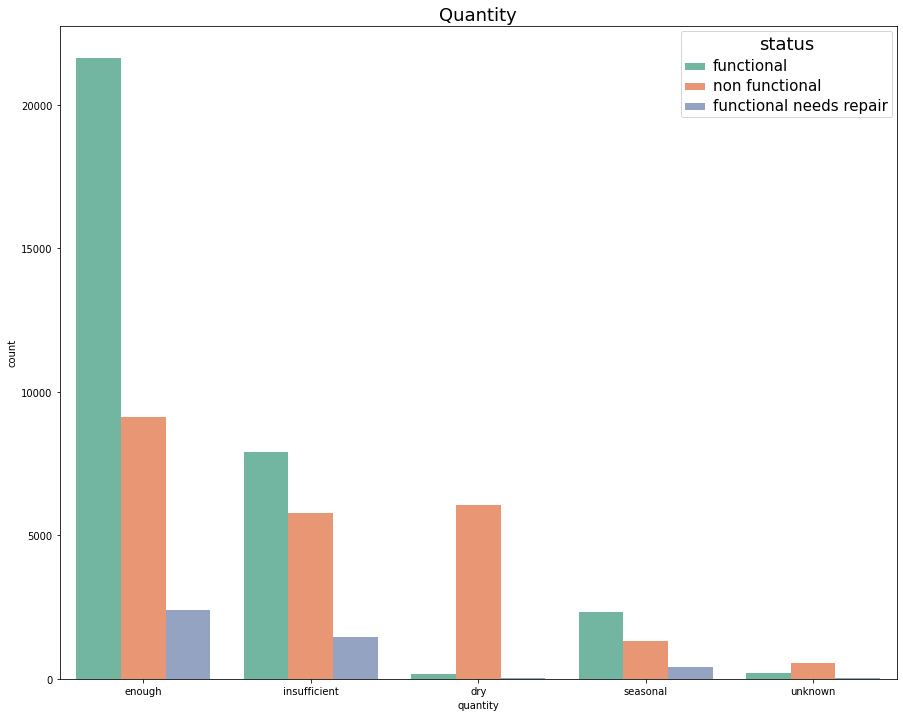

In [ ]:
import seaborn as sns

plt.figure(figsize=(15,12))
ax = sns.countplot(x='quantity', hue='status', data=df, palette='Set2')
plt.title('Quantity', fontsize =18)
plt.setp(ax.get_legend().get_texts(), fontsize='15')
plt.setp(ax.get_legend().get_title(), fontsize='18')
plt.show()

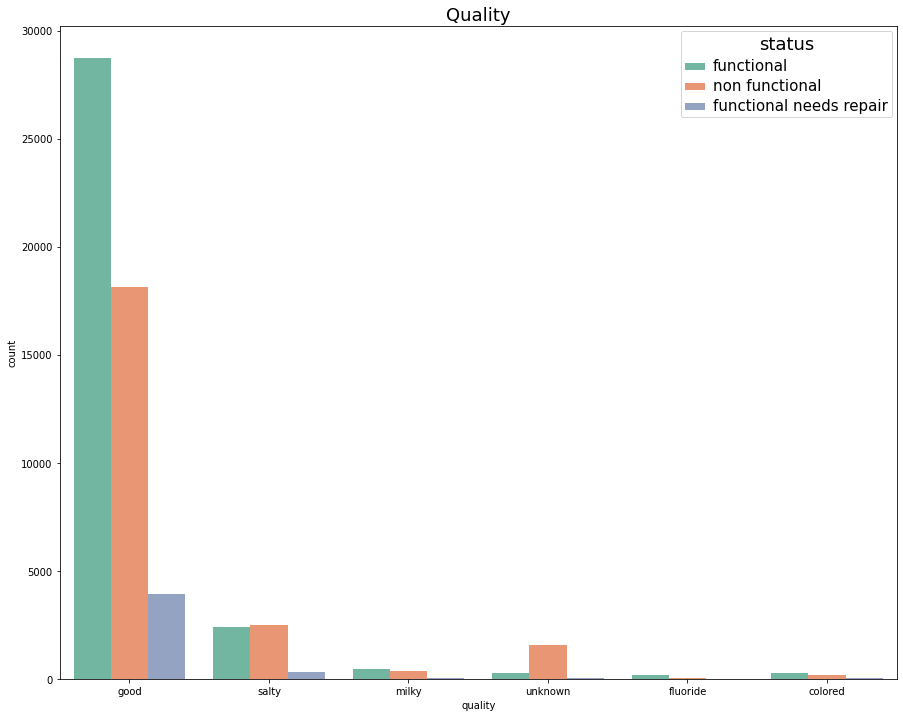

In [ ]:
plt.figure(figsize=(15,12))
ax2 = sns.countplot(x='quality', hue='status', data=df, palette='Set2')
plt.title('Quality', fontsize =18)
plt.setp(ax2.get_legend().get_texts(), fontsize='15')
plt.setp(ax2.get_legend().get_title(), fontsize='18')
plt.show()

countplot으로는 `quantity`의 dry값을 제외하고는 확실한 영향을 알 수 없음. 모델링 이후 특성 중요도를 통해 확인해야 함

2) `payment_type`컬럼은 water point(우물) 이용료를 어떤 방식으로 지불하는지 나타내는데, 무료로 이용하는 우물들이 아무래도 문제가 많을 것 같다는 예상을 함.

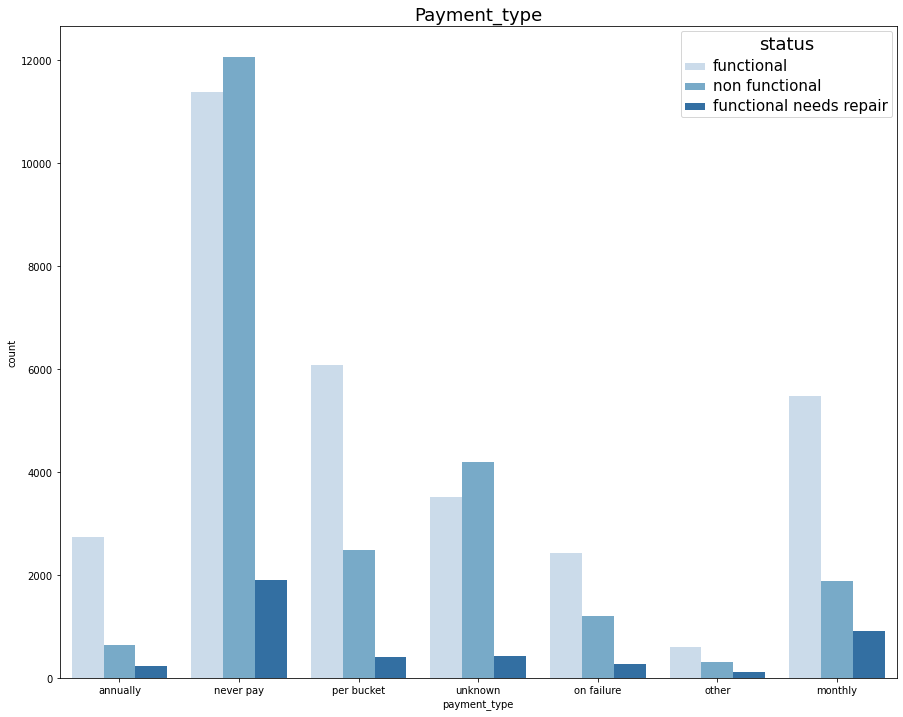

In [ ]:
import seaborn as sns

plt.figure(figsize=(15,12))
ax3 = sns.countplot(x='payment_type', hue='status', data=df, palette='Blues')
plt.title('Payment_type', fontsize =18)
plt.setp(ax3.get_legend().get_texts(), fontsize='15')
plt.setp(ax3.get_legend().get_title(), fontsize='18')
plt.show()

그래프를 보면, annually, per bucket, monthly 단위로 이용료를 내는 우물들이 잘 작동하는 비율이 높은 것을 알 수 있으며, 이용료가 없거나 지출방식이 불분명한 경우 못 쓰게된 우물이 더 많은 것을 확인할 수 있다. \

우물의 유지보수와 더불어 이용자의 주인의식, 자립의식 고취를 위해서도 소정의 이용료를 부과하는 방식이 공익을 위해 중요한데, \
향 후 모델링을 활용해 우물을 수리하거나 재설치하러 방문하는 경우, 설치 및 유지보수 뿐만 아니라 커뮤니티 차원의 우물관리 교육을 함께 진행하고 실행여부를 모니터링하는 것이 좋을 듯 하다.

3) 오래된 우물일수록 작동이 되지 않는 경우가 많을 것 같다고 예상됨
`construction_year`컬럼 값을 통해 확인하고자 함

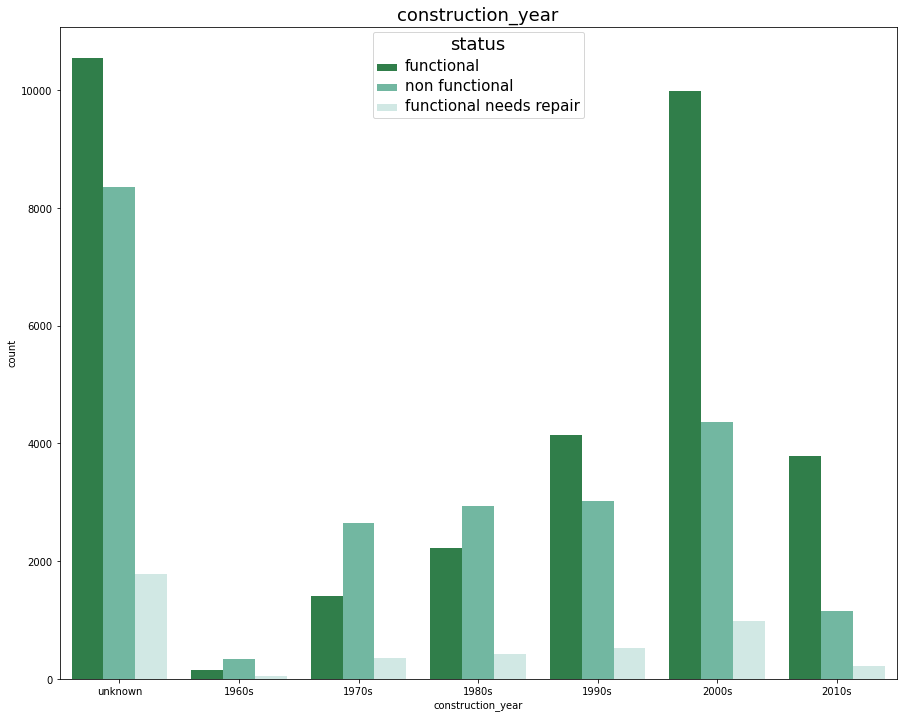

In [ ]:
plt.figure(figsize=(15,12))
ax4 = sns.countplot(x='construction_year', hue='status', data=df, palette='BuGn_r')
plt.title('construction_year', fontsize =18)
plt.setp(ax4.get_legend().get_texts(), fontsize='15')
plt.setp(ax4.get_legend().get_title(), fontsize='18')
plt.show()

'unknown'의 경우 데이터의 부재로 정확한 설치년도를 알 수 없으나, \
예상과 비슷하게 설치한지 오래된 우물일수록 작동에 이상이 있는 경우가 많음\
모델링 과정과 별개로 오래된 우물들의 상태조사를 각 지역별로 실시하는 것도 우물 유지차원에서 좋은 대처 방안이 될 것으로 보임.

#Part2 모델링

## 타겟 클래스 확인, 데이터 나누기

타겟 컬럼의 레이블 값 분포 확인

In [ ]:
df['status'].value_counts(normalize=True)

functional                 0.543081
non functional             0.384242
functional needs repair    0.072677
Name: status, dtype: float64

In [ ]:
import matplotlib.pyplot as plt

def analysis_on_target(df):
    
    n_func_label, n_nonfunc_label, n_repair_label = (df['status'] == 'functional').sum(), (df['status'] == 'non functional').sum(), (df['status'] == 'functional needs repair').sum()

    plt.pie(
        (n_func_label, n_nonfunc_label, n_repair_label),
        labels=('functional', 'non functional', 'functional needs repair'),
        autopct="%.2f%%",
        shadow=True,
        startangle=90,)
    plt.title("Target: Status", size=15)
    plt.show()

    return n_func_label, n_nonfunc_label, n_repair_label

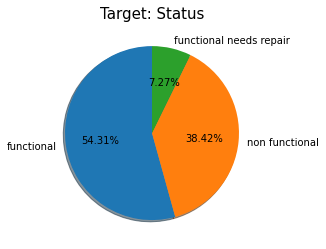

(32259, 22824, 4317)

In [ ]:
analysis_on_target(df)

데이터를 train과 validation, test데이터로 나눠줌

In [ ]:
#데이터를 train과 validation, test데이터로 나눠줌
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, train_size=0.80, test_size=0.20, stratify=df['status'], random_state=2)
train, val = train_test_split(train, train_size=0.80, test_size=0.20, stratify=train['status'], random_state=2)

print("train set : ",train.shape)
print("validation set : ",val.shape)
print("test set : ",test.shape)

train set :  (38016, 21)
validation set :  (9504, 21)
test set :  (11880, 21)


In [ ]:
train

id date_recorded  gps_height  longitude  latitude            basin  \
27530   4380    2011-07-22        1199  30.506154 -2.792575    Lake Victoria   
26672    505    2013-03-21        1259  37.012617 -3.228929          Pangani   
38547  33656    2011-03-10        1697  34.291268 -9.624901       Lake Nyasa   
44969  19692    2011-04-09        1741  35.938846 -6.139130      Wami / Ruvu   
41796  29668    2011-07-09        1199  31.093020 -1.630657    Lake Victoria   
...      ...           ...         ...        ...       ...              ...   
9933   66698    2012-10-11        1177  32.849719 -5.555274  Lake Tanganyika   
12165  23236    2011-08-04          80  39.057503 -4.988735          Pangani   
610    11957    2011-04-14        1360  33.849521 -8.823025           Rufiji   
50512  46751    2013-03-28        1515  36.837115 -3.319224          Pangani   
39029  19657    2011-07-16        1360  33.823972 -9.189374       Lake Nyasa   

            region           lga        ward  amount_tsh  ... extraction_type  \
27530       Kagera         Ngara    Bugarama         0.0  ...   india mark ii   
26672  Kilimanjaro          Siha   Siha Kati         0.0  ...         gravity   
38547       Iringa        Makete      Lupila       500.0  ...         gravity   
44969       Dodoma  Dodoma Urban      Mtumba         0.0  ...            mono   
41796       Kagera       Karagwe  Nyakahanga         0.0  ...         gravity   
...            ...           ...         ...         ...  ...             ...   
9933        Tabora       Sikonge     Sikonge         0.0  ...     nira/tanira   
12165        Tanga         Tanga   Mabokweni         0.0  ...     nira/tanira   
610          Mbeya       Mbarali     Igurusi         0.0  ...         gravity   
50512       Arusha          Meru     Songoro         0.0  ...         gravity   
39029        Mbeya        Rungwe      Isange         0.0  ...         gravity   

                source_type     waterpoint_type   management payment_type  \
27530          shallow well           hand pump          vwc    never pay   
26672                spring  communal standpipe  water board      monthly   
38547                spring  communal standpipe          vwc   on failure   
44969              borehole               other          vwc   per bucket   
41796  rainwater harvesting  communal standpipe          vwc    never pay   
...                     ...                 ...          ...          ...   
9933           shallow well               other          vwc    never pay   
12165          shallow well           hand pump          vwc    never pay   
610              river/lake  communal standpipe          wua      monthly   
50512                spring  communal standpipe          vwc      unknown   
39029            river/lake  communal standpipe          vwc    never pay   

      quality      quantity populaion public_meeting                   status  
27530    good        enough  less 100           True               functional  
26672    good        enough  less 100           True               functional  
38547    good        enough  less 100           True               functional  
44969    good           dry  less 100           True           non functional  
41796    good      seasonal  less 100           True               functional  
...       ...           ...       ...            ...                      ...  
9933     good      seasonal  less 100          False           non functional  
12165    good           dry  less 500           True           non functional  
610      good      seasonal  less 100           True  functional needs repair  
50512    good  insufficient  less 500           True           non functional  
39029    good        enough  less 100           True               functional  

[38016 rows x 21 columns]

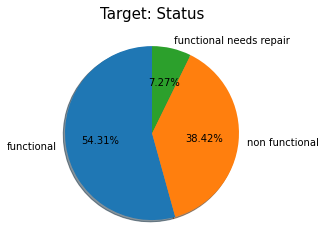

(20646, 14607, 2763)

In [ ]:
#train의 target값 비율 df와 동일한 것을 확인
analysis_on_target(train)

데이터를  X, y로 분리

In [ ]:
target = 'status'
features = df.drop(columns=[target]).columns

X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]
y_test = test[target]

##1. 기준모델

이제 정제한 train, validation 데이터를 이용하여 waterpoint(우물)의 작동 여부와 수리 필요 여부를 판단하는 모델을 만들고자 함. \

3클래스 다중 분류모델로서 

다중분류의 기준모델로 **'Random Rate Classifier'**를 적용함 \

*(출처 : https://towardsdatascience.com/calculating-a-baseline-accuracy-for-a-classification-model-a4b342ceb88f)*

In [ ]:
#Random Rate Classifier 정확도
Accuracy = (20646/38016*20646/38016 + 14607/38016*14607/38016 + 2763/38016*2763/38016) * 100
print(f'기준모델의 정확도 : {round(Accuracy ,3)}%')

기준모델의 정확도 : 44.786%


In [ ]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


##2. RandomForestClassifier

집단지성의 긍정적 효과를 경험할 수 있는 RandomForest모델은
\
간단한 구현에도 불구하고 좋은 성능을 보여주며, 다중분류 문제에도 별다른 설정이 필요없이 모델링이 가능하다.

In [ ]:
from category_encoders import OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from scipy.stats.distributions import uniform
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, roc_curve

pipe_random = make_pipeline(
    OrdinalEncoder(),
    RandomForestClassifier(random_state=29, oob_score=True, class_weight='balanced', n_jobs=-1),)

pipe_random.fit(X_train, y_train)

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['date_recorded', 'basin', 'region', 'lga',
                                      'ward', 'construction_year',
                                      'extraction_type', 'source_type',
                                      'waterpoint_type', 'management',
                                      'payment_type', 'quality', 'quantity',
                                      'populaion', 'public_meeting'],
                                mapping=[{'col': 'date_recorded',
                                          'data_type': dtype('O'),
                                          'mapping': 2011-07-22      1
2013-03-21      2
2011-03-10      3
20...
                                          'data_type': CategoricalDtype(categories=['less 100', 'less 500', 'less 1,000', 'less 5,000',
                  'less 10,000', 'less 50,000'],
, ordered=True),
                                          'mapping': less 100       1
less 500 

In [ ]:
print("훈련 정확도: ", pipe_random.score(X_train, y_train))
print("검증 정확도: ", pipe_random.score(X_val, y_val))

훈련 정확도:  0.9999736952861953
검증 정확도:  0.7969276094276094


훈련 정확도와 검증 정확도 모두 높게 나왔다. 특히 훈련 정확도는 과적합으로 볼만한 값이 나왔는데, \
실제 의미가 있는지 검증데이터의 classification report와 혼동행렬을 같이 보는 것이 좋을 듯 하다.

In [ ]:
y_pred = pipe_random.predict(X_val)
print(classification_report(y_val, y_pred))

                         precision    recall  f1-score   support

             functional       0.80      0.88      0.84      5161
functional needs repair       0.52      0.32      0.39       691
         non functional       0.83      0.77      0.80      3652

               accuracy                           0.80      9504
              macro avg       0.72      0.66      0.68      9504
           weighted avg       0.79      0.80      0.79      9504



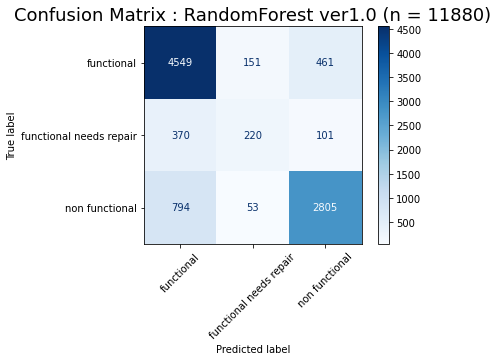

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_val, y_pred, cmap=plt.cm.Blues)
plt.title(f"Confusion Matrix : RandomForest ver1.0 (n = {len(y_test)})", fontsize=18)
plt.xticks(rotation=45)
plt.show()

'functional'과 'non functional'의 예측 정확도가 높다. \
반면에 가장 적은 데이터 수의 'functional needs repair'값을 잘 못 맞추는 경향을 보인다.

이어서 모델의 성능을 높이기 위해 RandomizedSearchCV를 진행하기로 한다.

In [ ]:
params = {
    "randomforestclassifier__n_estimators":[100, 150, 200],
    "randomforestclassifier__max_depth":[6, 8, 10, 12],
    "randomforestclassifier__min_samples_split":[4, 6, 8, 10]}
   
randomized_search = RandomizedSearchCV(
    pipe_random,
    param_distributions=params,
    scoring="accuracy",
    n_iter=10,
    cv=3,
    verbose=1,
    random_state=29,)

randomized_search.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('ordinalencoder',
                                              OrdinalEncoder(cols=['date_recorded',
                                                                   'basin',
                                                                   'region',
                                                                   'lga',
                                                                   'ward',
                                                                   'construction_year',
                                                                   'extraction_type',
                                                                   'source_type',
                                                                   'waterpoint_type',
                                                                   'management',
                                                                   'payment_type',
                   

In [ ]:
print("최적 하이퍼파라미터: ", randomized_search.best_params_)
print("최적 정확도: ", randomized_search.best_score_)

최적 하이퍼파라미터:  {'randomforestclassifier__n_estimators': 200, 'randomforestclassifier__min_samples_split': 4, 'randomforestclassifier__max_depth': 12}
최적 정확도:  0.7415561868686869


최적 하이퍼파라미터:  
{'randomforestclassifier__n_estimators': 200, 'randomforestclassifier__min_samples_split': 4, 'randomforestclassifier__max_depth': 12} \

최적 정확도:  0.7415561868686869

In [ ]:
print("훈련 정확도: ", randomized_search.score(X_train, y_train))
print("검증 정확도: ", randomized_search.score(X_val, y_val))

훈련 정확도:  0.8043981481481481
검증 정확도:  0.7352693602693603


In [ ]:
y_pred2 = randomized_search.predict(X_val)
print(classification_report(y_val, y_pred2))

                         precision    recall  f1-score   support

             functional       0.81      0.76      0.79      5161
functional needs repair       0.30      0.62      0.40       691
         non functional       0.82      0.72      0.76      3652

               accuracy                           0.74      9504
              macro avg       0.64      0.70      0.65      9504
           weighted avg       0.78      0.74      0.75      9504



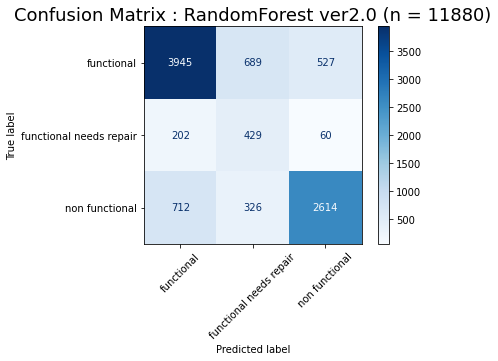

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_val, y_pred2, cmap=plt.cm.Blues)
plt.title(f"Confusion Matrix : RandomForest ver2.0 (n = {len(y_test)})", fontsize=18)
plt.xticks(rotation=45)
plt.show()

찾아낸 최적의 하이퍼파라미터 값으로 훈련을 한 결과, 훈련정확도와 검증 정확도가 더 떨어지는 결과를 낳았다. \
하지만 검증데이터의 혼동행렬을 보면 'functional needs repair'값을 이전보다 약 2배 가까이 잘 맞추는 성능을 보이고 있다. 

##3. XGBClassifier

기존 모델의 잔차를 학습하여 개선된 모델을 만들어가는, 비유하자면 복습에 능한 모델이다.

In [ ]:
#encoder = OrdinalEncoder()
#X_train_encoded = encoder.fit_transform(X_train)
#X_val_encoded = encoder.transform(X_val)

#xgb = XGBClassifier(objective ='multi:softprob', eval_metric="merror", n_estimators=20000,
#        random_state=29, n_jobs=-1,
#        max_depth=6, learning_rate=0.1,reg_lambda=1)

#watchlist = [(X_train_encoded, y_train), (X_val_encoded, y_val)]

#xgb.fit(X_train_encoded, y_train, eval_set=watchlist, early_stopping_rounds=50,)

`n_estimators` 최적값 확인 : 447

타겟의 비율이 상이하기 때문에 sample_weights를 계산해서 fit과정에 반영해주도록 함

In [ ]:
from sklearn.utils.class_weight import compute_sample_weight
sample_weights = compute_sample_weight(class_weight='balanced', y=train['status']) #provide your own target name

In [ ]:
from xgboost import XGBClassifier

pipe_xgb = make_pipeline(
    OrdinalEncoder(),
    XGBClassifier(objective ='multi:softprob', eval_metric="merror", n_estimators=447,
        random_state=29, n_jobs=-1, scale_pos_weight= 4,
        max_depth=6, learning_rate=0.1,))
    
pipe_xgb.fit(X_train, y_train, xgbclassifier__sample_weight=sample_weights)

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['date_recorded', 'basin', 'region', 'lga',
                                      'ward', 'construction_year',
                                      'extraction_type', 'source_type',
                                      'waterpoint_type', 'management',
                                      'payment_type', 'quality', 'quantity',
                                      'populaion', 'public_meeting'],
                                mapping=[{'col': 'date_recorded',
                                          'data_type': dtype('O'),
                                          'mapping': 2011-07-22      1
2013-03-21      2
2011-03-10      3
20...
, ordered=True),
                                          'mapping': less 100       1
less 500       2
less 1,000     3
less 5,000     4
less 10,000    5
less 50,000    6
NaN           -2
dtype: int64},
                                         {'col': 'public_meeting',
          

In [ ]:
print("훈련 정확도: ", pipe_xgb.score(X_train, y_train))
print("검증 정확도: ", pipe_xgb.score(X_val, y_val))

훈련 정확도:  0.8416719276094277
검증 정확도:  0.7441077441077442


In [ ]:
y_pred3 = pipe_xgb.predict(X_val)
print(classification_report(y_val, y_pred3))

                         precision    recall  f1-score   support

             functional       0.83      0.76      0.79      5161
functional needs repair       0.31      0.62      0.41       691
         non functional       0.81      0.75      0.78      3652

               accuracy                           0.74      9504
              macro avg       0.65      0.71      0.66      9504
           weighted avg       0.78      0.74      0.76      9504



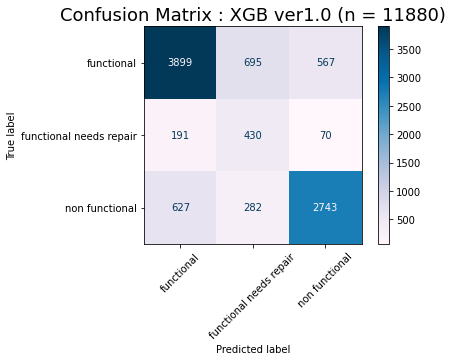

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_val, y_pred3, cmap=plt.cm.PuBu)
plt.title(f"Confusion Matrix : XGB ver1.0 (n = {len(y_test)})", fontsize=18)
plt.xticks(rotation=45)
plt.show()

앞서 보았던 RandomForest ver2.0와 비슷한 성능을 보이고 있다.

In [ ]:
from scipy.stats.distributions import uniform

params = {
    "xgbclassifier__max_depth":[8, 10, 12],
    "xgbclassifier__min_samples_split":[4, 6, 8, 10],
    "xgbclassifier__colsample_bytree": uniform(loc=0.5, scale=0.5),
    "xgbclassifier__learning_rate": uniform(loc=0, scale=1),
    }
    
randomized_search2 = RandomizedSearchCV(
    pipe_xgb,
    param_distributions=params,
    scoring="accuracy",
    n_iter=10,
    cv=3,
    verbose=2,
    random_state=29,)

randomized_search2.fit(X_train, y_train, xgbclassifier__sample_weight=sample_weights)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END xgbclassifier__colsample_bytree=0.9318799927850414, xgbclassifier__learning_rate=0.2849059652276268, xgbclassifier__max_depth=12, xgbclassifier__min_samples_split=4; total time=  59.6s
[CV] END xgbclassifier__colsample_bytree=0.9318799927850414, xgbclassifier__learning_rate=0.2849059652276268, xgbclassifier__max_depth=12, xgbclassifier__min_samples_split=4; total time=  56.4s
[CV] END xgbclassifier__colsample_bytree=0.9318799927850414, xgbclassifier__learning_rate=0.2849059652276268, xgbclassifier__max_depth=12, xgbclassifier__min_samples_split=4; total time=  56.2s
[CV] END xgbclassifier__colsample_bytree=0.8816186021651424, xgbclassifier__learning_rate=0.45271905759941133, xgbclassifier__max_depth=10, xgbclassifier__min_samples_split=10; total time=  46.2s
[CV] END xgbclassifier__colsample_bytree=0.8816186021651424, xgbclassifier__learning_rate=0.45271905759941133, xgbclassifier__max_depth=10, xgbclassifier__min_sa

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('ordinalencoder',
                                              OrdinalEncoder(cols=['date_recorded',
                                                                   'basin',
                                                                   'region',
                                                                   'lga',
                                                                   'ward',
                                                                   'construction_year',
                                                                   'extraction_type',
                                                                   'source_type',
                                                                   'waterpoint_type',
                                                                   'management',
                                                                   'payment_type',
                   

In [ ]:
print("최적 하이퍼파라미터: ", randomized_search2.best_params_)
print("최적 정확도: ", randomized_search2.best_score_)

최적 하이퍼파라미터:  {'xgbclassifier__colsample_bytree': 0.718993764432833, 'xgbclassifier__learning_rate': 0.12903977031017677, 'xgbclassifier__max_depth': 10, 'xgbclassifier__min_samples_split': 10}
최적 정확도:  0.7791982323232324


최적 하이퍼파라미터: \
{'xgbclassifier__colsample_bytree': 0.6279574372809442, 'xgbclassifier__learning_rate': 0.28567192754633186, 'xgbclassifier__max_depth': 12, 'xgbclassifier__min_samples_split': 4} \

최적 정확도:  0.7804608585858586

In [ ]:
print("훈련 정확도: ", randomized_search2.score(X_train, y_train))
print("검증 정확도: ", randomized_search2.score(X_val, y_val))

훈련 정확도:  0.9889520202020202
검증 정확도:  0.7880892255892256


In [ ]:
y_pred4 = randomized_search2.predict(X_val)
print(classification_report(y_val, y_pred4))

                         precision    recall  f1-score   support

             functional       0.82      0.84      0.83      5161
functional needs repair       0.42      0.47      0.45       691
         non functional       0.82      0.77      0.80      3652

               accuracy                           0.79      9504
              macro avg       0.69      0.69      0.69      9504
           weighted avg       0.79      0.79      0.79      9504



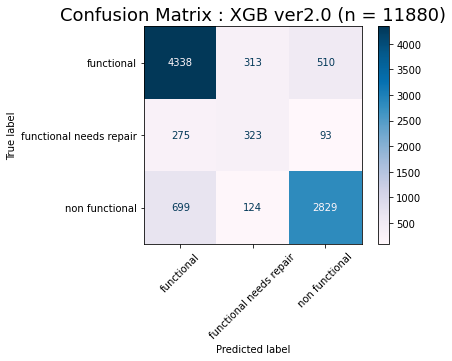

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_val, y_pred4, cmap=plt.cm.PuBu)
plt.title(f"Confusion Matrix : XGB ver2.0 (n = {len(y_test)})", fontsize=18)
plt.xticks(rotation=45)
plt.show()

XGBoost의 RandomizedSearchCV를 진행했는데, 생각보다 시간이 다소 오래 걸렸음에도 좋은 성능을 보여주지 못하고 있다. \
오히려 ver1.0보다 성능이 더 떨어진 것을 확인할 수 있다. \
RandomizedSearchCV로 학습데이터에 과적합 양상을 보이기 때문에 alpha, gamma 등 일반화 하이퍼파라미터를 조정해야함에도 불구하고 \
긴 시간을 소요하기 때문에 효율적이지 않다고 판단된다.

##4. LightGBM

XGBoost처럼 복습에 능한 모델이지만 학습 및 예측시간이 비교적 상당히 빠른 편이고 메모리도 더 적게 사용한다고 한다.

In [ ]:
from lightgbm import LGBMClassifier

pipe_lgb = make_pipeline(
    OrdinalEncoder(),
    LGBMClassifier(objective ='multiclass',
                   num_class=3,learning_rate= 0.1,
                   num_leaves= 100, max_depth= 50, min_data_in_leaf=5,
                   feature_fraction= 0.5, bagging_fraction= 0.8, bagging_freq= 7,
                   boosting_type= 'gbdt', random_state=29,
                   class_weight = 'balanced'))

pipe_lgb.fit(X_train, y_train)

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['date_recorded', 'basin', 'region', 'lga',
                                      'ward', 'construction_year',
                                      'extraction_type', 'source_type',
                                      'waterpoint_type', 'management',
                                      'payment_type', 'quality', 'quantity',
                                      'populaion', 'public_meeting'],
                                mapping=[{'col': 'date_recorded',
                                          'data_type': dtype('O'),
                                          'mapping': 2011-07-22      1
2013-03-21      2
2011-03-10      3
20...
less 10,000    5
less 50,000    6
NaN           -2
dtype: int64},
                                         {'col': 'public_meeting',
                                          'data_type': dtype('O'),
                                          'mapping': True       1
unknown    2
Fa

In [ ]:
print("훈련 정확도: ", pipe_lgb.score(X_train, y_train))
print("검증 정확도: ", pipe_lgb.score(X_val, y_val))

훈련 정확도:  0.8156039562289562
검증 정확도:  0.7441077441077442


In [ ]:
y_pred5 = pipe_lgb.predict(X_val)
print(classification_report(y_val, y_pred5))

                         precision    recall  f1-score   support

             functional       0.83      0.76      0.79      5161
functional needs repair       0.30      0.65      0.41       691
         non functional       0.82      0.74      0.78      3652

               accuracy                           0.74      9504
              macro avg       0.65      0.72      0.66      9504
           weighted avg       0.79      0.74      0.76      9504



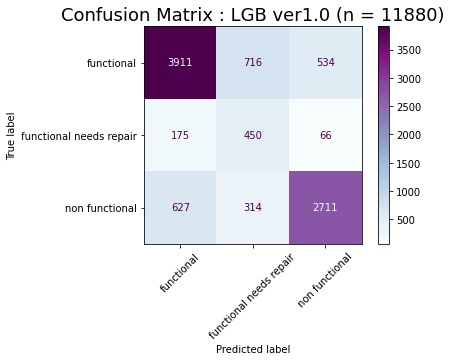

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_val, y_pred5, cmap=plt.cm.BuPu)
plt.title(f"Confusion Matrix : LGB ver1.0 (n = {len(y_test)})", fontsize=18)
plt.xticks(rotation=45)
plt.show()

이렇다할 하이퍼파라미터 튜닝이 없었음에도 불구하고 RandomForest ver2.0 보다 근소하게 좋은 성능을 보여주고 있다. \
그리고 학습 및 예측 시간이 세 모델 중 가장 빨라 여러 추가적인 작업을 해주기에 좋아보인다.

**따라서 우리는 LightBGM을 기반의 모델을 선택하고, 하이퍼파라미터 튜닝 등 추가적인 작업을 통해 모델의 성능을 올리고자 한다.**

선택한 모델에는 베이지안 최적화 방법론을 사용하는 `optuna`를 사용해 하이퍼파라미터들을 튜닝하기로 한다.

In [ ]:
!pip3 install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 348 kB 27.6 MB/s 
     |████████████████████████████████| 209 kB 51.5 MB/s 
     |████████████████████████████████| 81 kB 8.7 MB/s 
     |████████████████████████████████| 78 kB 5.6 MB/s 
     |████████████████████████████████| 112 kB 79.4 MB/s 
     |████████████████████████████████| 147 kB 71.0 MB/s 
     |████████████████████████████████| 49 kB 2.5 MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11137 sha256=57c80377c73630f1a5512168c0578a2ea0e119f78a9f1eaf6f6e9c17eca096e9
  Stored in directory: /root/.cache/pip/wheels/9f/18/84/8f69f8b08169c7bae2dde6bd7daf0c19fca8c8e500ee620a28
Successfully built pyperclip


In [ ]:
import optuna
from optuna import Trial, visualization

In [ ]:
def objective(trial: optuna.Trial):
  params_lgb = {
      "objective": 'multiclass',
      "num_class":3,
      "verbosity": -1,
      "boosting_type":'gbdt',
      "class_weight":'balanced',
      "learning_rate":trial.suggest_loguniform('learning_rate',0.01,0.8),
      "lambda_l1":trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
      "lambda_l2":trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
      "num_leaves":trial.suggest_int('num_leaves', 2, 256),
      "max_depth":trial.suggest_int('max_depth',10,100),
      "min_data_in_leaf":trial.suggest_int('min_data_in_leaf',5,150),
      "feature_fraction":trial.suggest_uniform('feature_fraction', 0.5, 1.0),
      "bagging_fraction":trial.suggest_uniform('bagging_fraction', 0.5, 1.0),
      "bagging_freq":trial.suggest_int('bagging_freq', 1, 7)}

  pipe_lgb2 = make_pipeline(
    OrdinalEncoder(), LGBMClassifier(**params_lgb))

  pipe_lgb2.fit(X_train, y_train)

  lgb_pred = pipe_lgb2.predict_proba(X_val)
  score = pipe_lgb2.score(X_val, y_val)

  return score

In [ ]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=200)

[I 2022-09-29 19:33:35,919] A new study created in memory with name: no-name-a5d05be4-8de4-4368-b249-91970359952a
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

/usr/local/lib/python3.7/dist-pac

In [ ]:
print("최적 하이퍼파라미터:", study.best_trial.params)
print("최적 정확도:", study.best_value)

최적 하이퍼파라미터: {'learning_rate': 0.2873558230812426, 'lambda_l1': 0.006214102705158622, 'lambda_l2': 0.2822400916744919, 'num_leaves': 251, 'max_depth': 91, 'min_data_in_leaf': 9, 'feature_fraction': 0.614500265184041, 'bagging_fraction': 0.9093016345530188, 'bagging_freq': 4}
최적 정확도: 0.7871422558922558


최적화된 하이퍼파라미터를 적용해 최종모델링

In [ ]:
pipe_lgb2 = make_pipeline(
    OrdinalEncoder(),
    LGBMClassifier(objective ='multiclass',
                   num_class=3,learning_rate= 0.2873558230812426,
                   lambda_l1= 0.006214102705158622,
                   lambda_l2= 0.2822400916744919,
                   num_leaves= 251, max_depth= 91, min_data_in_leaf=9,
                   feature_fraction= 0.614500265184041, bagging_fraction= 0.9093016345530188, bagging_freq= 4,
                   boosting_type= 'gbdt', random_state=29,
                   class_weight = 'balanced'))

pipe_lgb2.fit(X_train, y_train)

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['date_recorded', 'basin', 'region', 'lga',
                                      'ward', 'construction_year',
                                      'extraction_type', 'source_type',
                                      'waterpoint_type', 'management',
                                      'payment_type', 'quality', 'quantity',
                                      'populaion', 'public_meeting'],
                                mapping=[{'col': 'date_recorded',
                                          'data_type': dtype('O'),
                                          'mapping': 2011-07-22      1
2013-03-21      2
2011-03-10      3
20...
dtype: int64}])),
                ('lgbmclassifier',
                 LGBMClassifier(bagging_fraction=0.9093016345530188,
                                bagging_freq=4, class_weight='balanced',
                                feature_fraction=0.614500265184041,
                  

In [ ]:
print("훈련 정확도: ", pipe_lgb2.score(X_train, y_train))
print("검증 정확도: ", pipe_lgb2.score(X_val, y_val))

훈련 정확도:  0.9875578703703703
검증 정확도:  0.7816708754208754


In [ ]:
y_pred6 = pipe_lgb2.predict(X_val)
print(classification_report(y_val, y_pred6))

                         precision    recall  f1-score   support

             functional       0.81      0.83      0.82      5161
functional needs repair       0.42      0.44      0.43       691
         non functional       0.81      0.77      0.79      3652

               accuracy                           0.78      9504
              macro avg       0.68      0.68      0.68      9504
           weighted avg       0.78      0.78      0.78      9504



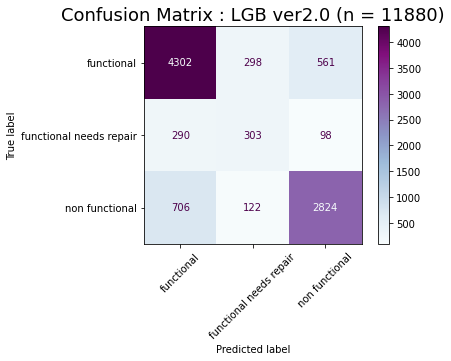

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_val, y_pred6, cmap=plt.cm.BuPu)
plt.title(f"Confusion Matrix : LGB ver2.0 (n = {len(y_test)})", fontsize=18)
plt.xticks(rotation=45)
plt.show()

최종모델링 결과, LGB ver1.0보다 정확도가 높지만 'functional needs repair'에 대한 예측 정확도가 낮다. \
그럼에도 불구하고 모델의 전반적인 성능을 고려했을때, 더 많은 예측에 성공한 LGB ver2.0을 최종 모델로 선정한다.

In [ ]:
# 최적화 과정 시각화
optuna.visualization.plot_optimization_history(study)

In [ ]:
# 파라미터들관의 관계
optuna.visualization.plot_parallel_coordinate(study)

In [ ]:
# 하이퍼파라미터 중요도
optuna.visualization.plot_param_importances(study)

## 최종점검

최종모델 : LGB ver2.0 \
테스트 데이터를 통해 성능 확인

In [ ]:
y_pred_final = pipe_lgb2.predict(X_test)
print(classification_report(y_test, y_pred_final))

                         precision    recall  f1-score   support

             functional       0.82      0.85      0.83      6452
functional needs repair       0.41      0.39      0.40       863
         non functional       0.82      0.78      0.80      4565

               accuracy                           0.79     11880
              macro avg       0.68      0.67      0.68     11880
           weighted avg       0.79      0.79      0.79     11880



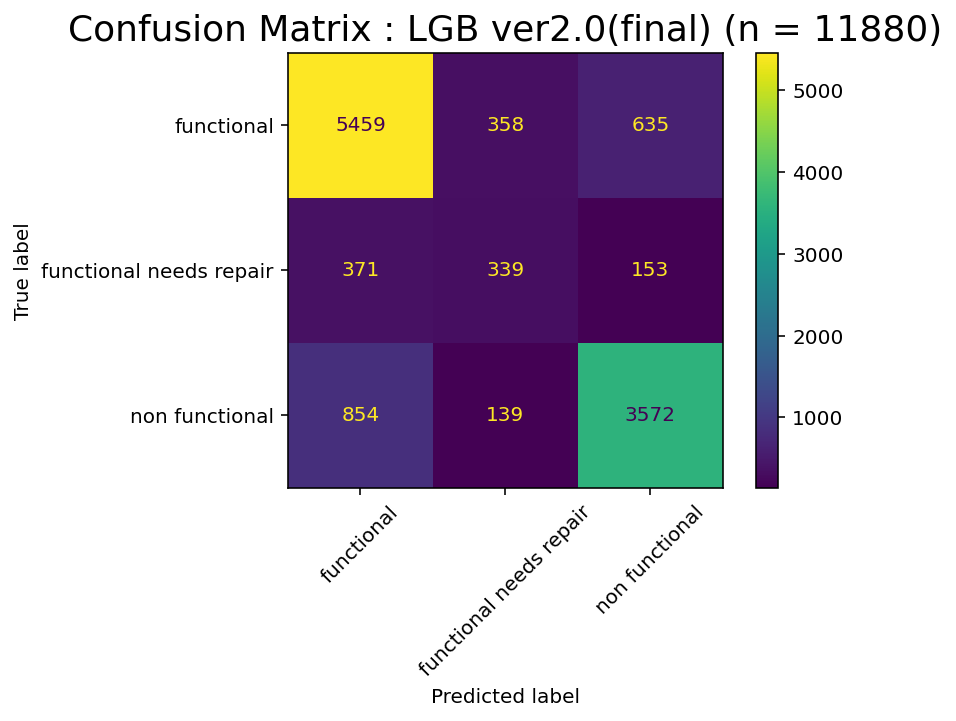

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_final, cmap=plt.cm.viridis)
plt.title(f"Confusion Matrix : LGB ver2.0(final) (n = {len(y_test)})", fontsize=18)
plt.xticks(rotation=45)
plt.show()

In [ ]:
!pip3 install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 216 kB 38.4 MB/s 
     |████████████████████████████████| 133 kB 46.5 MB/s 
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=5a761a9ac4873a7d7614a52ebac71e293ec989397269b5701f29c1bac47cb106
  Stored in directory: /root/.cache/pip/wheels/cc/3c/96/3ead31a8e6c20fc0f1a707fde2e05d49a80b1b4b30096573be
Successfully built eli5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but you have jinja2 3.1.2 which is incompatible.


순열중요도를 확인해 모델 성능에 많은 영향을 미친 특성을 파악하고자 함

In [ ]:
import eli5
from eli5.sklearn import PermutationImportance

# permuter 정의
permuter = PermutationImportance(
    pipe_lgb2.named_steps["lgbmclassifier"],
    scoring="accuracy",
    n_iter=10,  # 다른 random seed를 사용하여 10번 반복
    random_state=29,)

# 스코어를 다시 계산합니다.
X_test_preprocessed = pipe_lgb[0].transform(X_test)
permuter.fit(X_test_preprocessed, y_test)

PermutationImportance(estimator=LGBMClassifier(bagging_fraction=0.9093016345530188,
                                               bagging_freq=4,
                                               class_weight='balanced',
                                               feature_fraction=0.614500265184041,
                                               lambda_l1=0.006214102705158622,
                                               lambda_l2=0.2822400916744919,
                                               learning_rate=0.2873558230812426,
                                               max_depth=91, min_data_in_leaf=9,
                                               num_class=3, num_leaves=251,
                                               objective='multiclass',
                                               random_state=29),
                      n_iter=10, random_state=29, scoring='accuracy')

Text(0.5, 1.0, 'Permutation Importance')

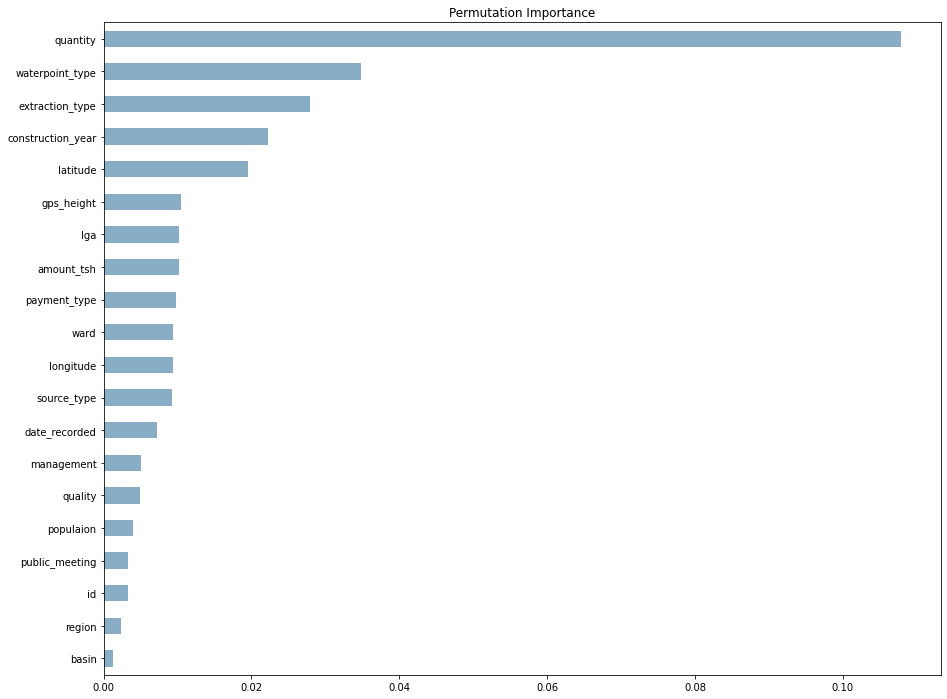

In [ ]:
feature_names = X_test.columns.tolist()
pi = pd.Series(permuter.feature_importances_, feature_names).sort_values()
plt.figure(figsize=(15,12))
pi.plot.barh()
plt.title("Permutation Importance")

In [ ]:
df.waterpoint_type.value_counts()

communal standpipe    34625
hand pump             17488
other                  6380
improved spring         784
cattle trough           116
dam                       7
Name: waterpoint_type, dtype: int64

In [ ]:
df.extraction_type.value_counts()

gravity              26780
nira/tanira           8154
other                 6430
submersible           4764
swn 80                3670
mono                  2865
india mark ii         2400
afridev               1770
ksb                   1415
rope pump              451
swn 81                 229
windmill               117
india mark iii          98
cemo                    90
play pump               85
walimi                  48
climax                  32
mkulima/shinyanga        2
Name: extraction_type, dtype: int64

In [ ]:
# 특성별 score을 확인
eli5.show_weights(
    permuter,
    top=None,
    feature_names=feature_names,)

모델의 타겟값 판단에는 예상대로 `quantity`의 영향이 컸다. 반면 `quality`의 영향은 꽤 작다. 경험자의 이야기에 따르면 수자원을 이용하는 주민들은 물이 워낙 귀하다보니 물의 품질에 대해 그리 까다롭게 굴지 않는다고 한다.

\
뒤이어 water point의 유형과 물을 긷는 방식이 예측에 큰 영향을 끼쳤다. \
추측하기로 순수 핸드펌프를 제외한 기계식 장치는 좀더 노후나 고장에 약하기 때문에 예측에 영향을 미쳤을 것으로 생각된다.

다음으로 `contruction_year`컬럼이 보이는데, 이 특성은 pdp plot을 이용해 가설을 확인해보도록 하겠다.

In [ ]:
!pip3 install pdpbox

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 34.0 MB 1.3 MB/s 
     |████████████████████████████████| 13.1 MB 12.1 MB/s 
  Created wheel for pdpbox: filename=PDPbox-0.2.1-py3-none-any.whl size=35758224 sha256=2ef05bedf19c4342d8bb881dbb61c9a24c60aaab6990fd28a91600dac47d9640
  Stored in directory: /root/.cache/pip/wheels/f4/d0/1a/b80035625c53131f52906a6fc4dd690d8efd2bf8af6a4015eb
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=94cb499ca6576eae8a0afae12f65ecfef880db45db567482756506bae59c5426
  Stored in directory: /root/.cache/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built pdpbox sklearn
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


In [ ]:
import matplotlib.pyplot as plt

plt.rcParams["figure.dpi"] = 144

In [ ]:
encoder = OrdinalEncoder()
X_train_encoded = encoder.fit_transform(X_train)
X_val_encoded = encoder.transform(X_val)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   id                 59400 non-null  int64   
 1   date_recorded      59400 non-null  object  
 2   gps_height         59400 non-null  int64   
 3   longitude          59400 non-null  float64 
 4   latitude           59400 non-null  float64 
 5   basin              59400 non-null  object  
 6   region             59400 non-null  object  
 7   lga                59400 non-null  object  
 8   ward               59400 non-null  object  
 9   amount_tsh         59400 non-null  float64 
 10  construction_year  59400 non-null  category
 11  extraction_type    59400 non-null  object  
 12  source_type        59400 non-null  object  
 13  waterpoint_type    59400 non-null  object  
 14  management         59400 non-null  object  
 15  payment_type       59400 non-null  object  
 16  qual

In [ ]:
from pdpbox.pdp import pdp_isolate, pdp_plot, pdp_interact, pdp_interact_plot

target_features = ["construction_year", "payment_type"]

interaction = pdp_interact(
    model=pipe_lgb2,
    dataset=X_val_encoded,
    model_features=X_val.columns,
    features=target_features,
)

(<Figure size 2160x2448 with 7 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f39358d7c50>,
  'pdp_inter_ax': [<matplotlib.axes._subplots.AxesSubplot at 0x7f39351f0150>,
   <matplotlib.axes._subplots.AxesSubplot at 0x7f39351e0f10>]})

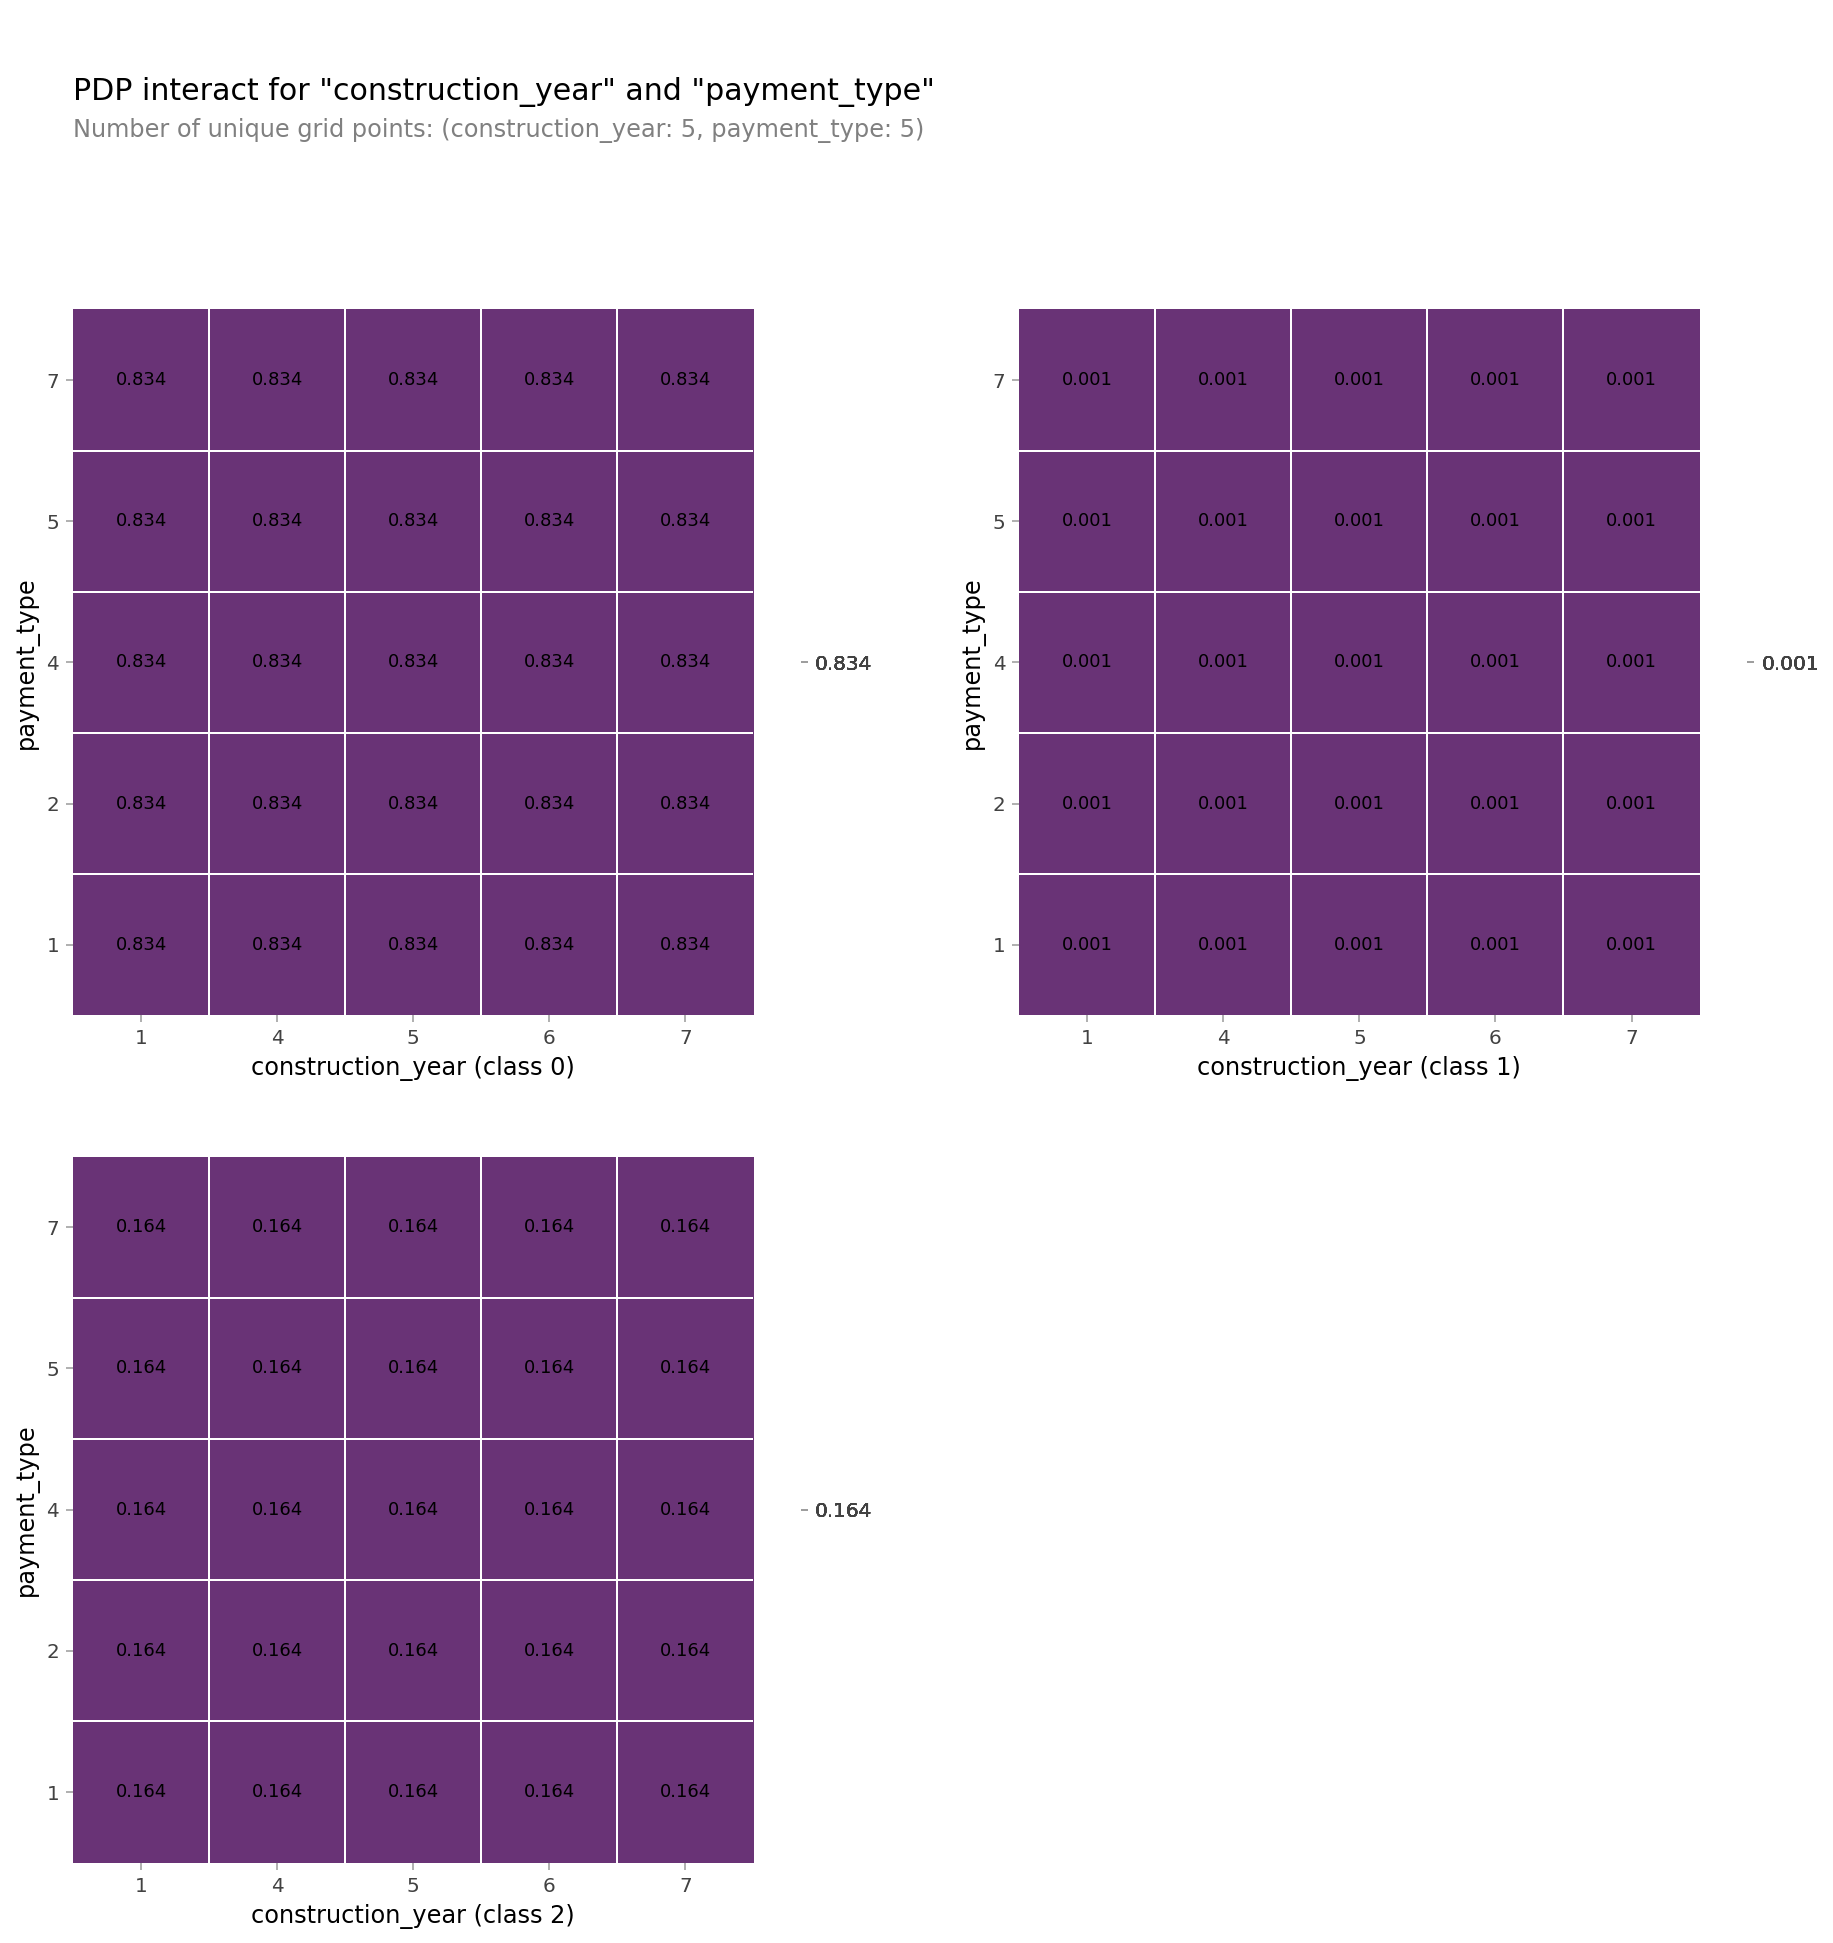

In [ ]:
pdp_interact_plot(interaction, plot_type="grid", feature_names=target_features)

In [ ]:
a = y_test[y_test == 'functional needs repair'].index
need_repair = X_test.loc[a]

In [ ]:
need_repair

id date_recorded  gps_height  longitude  latitude            basin  \
54014   1560    2011-07-25        1186  32.946306 -2.066514    Lake Victoria   
46709  53306    2011-03-15        1496  38.312402 -4.614216          Pangani   
15148  24214    2013-02-12        1348  30.018186 -4.332141  Lake Tanganyika   
59114  32600    2011-02-27         363  37.509610 -6.267473      Wami / Ruvu   
16140  64618    2011-04-14        1360  33.847153 -8.823542           Rufiji   
...      ...           ...         ...        ...       ...              ...   
36679   4140    2013-07-03         499  38.053860 -4.304025          Pangani   
58896  10581    2011-08-05        1199  30.657076 -1.155246    Lake Victoria   
52784  52365    2011-08-04        1360  33.618818 -9.339673       Lake Nyasa   
22592  46394    2011-04-10        1360  34.022993 -8.860281           Rufiji   
22383   2631    2013-02-12        1187  30.415257 -3.803039  Lake Tanganyika   

            region      lga       ward  amount_tsh construction_year  \
54014       Mwanza  Ukerewe      Bwiro         0.0             1990s   
46709        Tanga  Lushoto    Malindi         0.0             1980s   
15148       Kigoma   Kasulu  Munyegera       250.0             2000s   
59114     Morogoro  Mvomero    Hembeti         0.0             1980s   
16140        Mbeya  Mbarali    Igurusi         0.0           unknown   
...            ...      ...        ...         ...               ...   
36679  Kilimanjaro     Same      Maore      5000.0             2010s   
58896       Kagera  Karagwe    Kibingo         0.0           unknown   
52784        Mbeya   Rungwe  Kisondela         0.0           unknown   
22592        Mbeya  Mbarali    Chimala         0.0           unknown   
22383       Kigoma  Kibondo   Kumsenga         0.0             2010s   

      extraction_type           source_type     waterpoint_type  management  \
54014           other                spring               other  user-group   
46709         gravity                spring  communal standpipe  user-group   
15148         gravity            river/lake  communal standpipe  user-group   
59114         gravity            river/lake  communal standpipe  user-group   
16140         gravity            river/lake  communal standpipe  user-group   
...               ...                   ...                 ...         ...   
36679         gravity            river/lake  communal standpipe  user-group   
58896         gravity  rainwater harvesting  communal standpipe       other   
52784         gravity            river/lake  communal standpipe  user-group   
22592         gravity            river/lake  communal standpipe  user-group   
22383         gravity                spring  communal standpipe  user-group   

      payment_type quality      quantity   populaion public_meeting  
54014    never pay    good  insufficient  less 1,000           True  
46709    never pay    good        enough    less 100           True  
15148      monthly    good  insufficient  less 1,000           True  
59114    never pay    good        enough    less 500           True  
16140      monthly    good      seasonal    less 100           True  
...            ...     ...           ...         ...            ...  
36679     annually    good        enough    less 500           True  
58896    never pay    good      seasonal    less 100           True  
52784    never pay    good  insufficient    less 100           True  
22592    never pay    good      seasonal    less 100           True  
22383      unknown    good        enough    less 500           True  

[863 rows x 20 columns]

In [ ]:
import plotly.express as px
fig = px.scatter(data_frame=need_repair,y=need_repair['latitude'], x=need_repair['longitude'],color=need_repair['lga'],opacity=0.5)
fig.show()